# Time-Domain Analysis

# Dataset download and exploration

In [26]:
import os
import librosa

# 1-Path to dataset
data_path = 'free-spoken-digit-dataset/recordings'

# 2-Listting some files
files = os.listdir(data_path)


# 3-Loading an audio file
audio, sr = librosa.load(os.path.join(data_path, files[0]))
print(f"Sample Rate: {sr}, Audio shape: {audio.shape}")

Sample Rate: 22050, Audio shape: (6571,)


In [28]:
# 1-Parsing metadata from filenames
data_info = []
for f in files:
    if f.endswith('.wav'):
        digit, speaker, idx = f.replace('.wav', '').split('_')
        path = os.path.join(data_path, f)
        duration = librosa.get_duration(path=path)
        data_info.append([f, int(digit), speaker, int(idx), duration])

df = pd.DataFrame(data_info, columns=["filename", "digit", "speaker", "index", "duration"])

# 2-Printing dataset summary
print("\n🎧 Dataset: Free-Spoken Digit Dataset (FSDD)")
print(f"📁 Total files: {len(df)}")
print(f"🔢 Unique digits: {sorted(df['digit'].unique())}")
print(f"🧑 Unique speakers: {sorted(df['speaker'].unique())}")
print(f"⏱️ Duration (min - max): {df['duration'].min():.2f}s to {df['duration'].max():.2f}s")


🎧 Dataset: Free-Spoken Digit Dataset (FSDD)
📁 Total files: 3000
🔢 Unique digits: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9)]
🧑 Unique speakers: ['george', 'jackson', 'lucas', 'nicolas', 'theo', 'yweweler']
⏱️ Duration (min - max): 0.14s to 2.28s


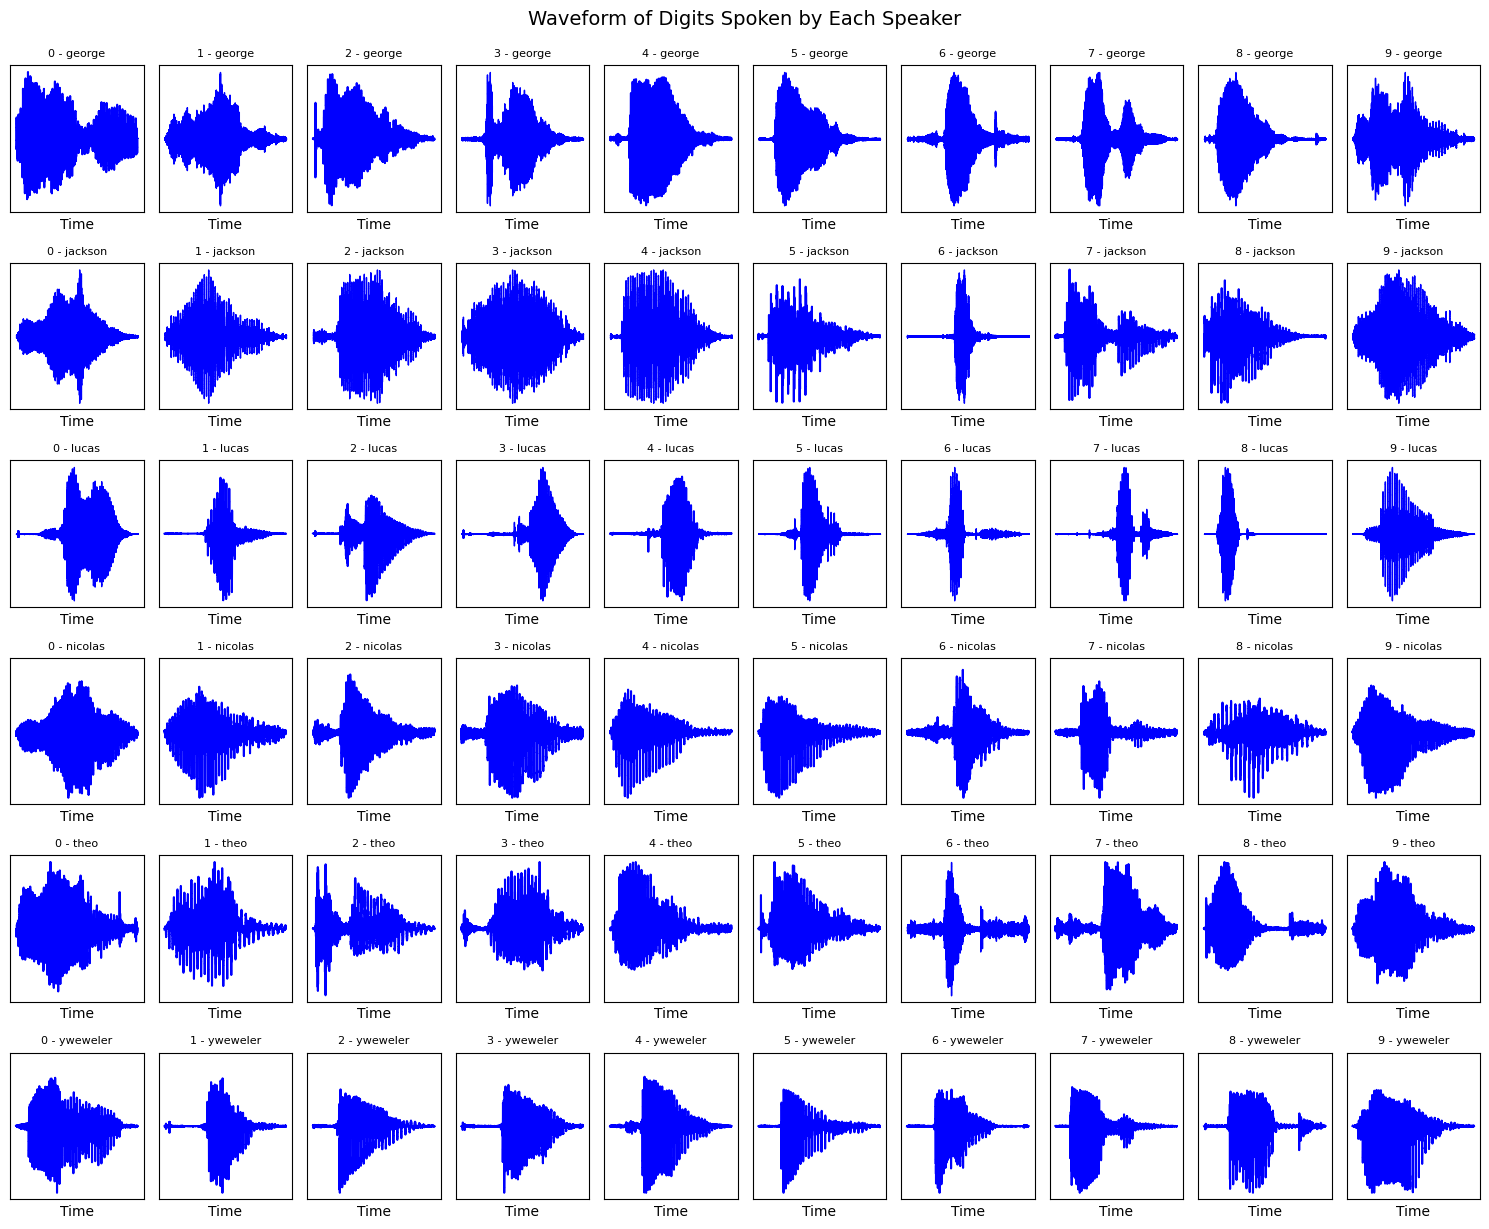

In [30]:
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# 1-Loading all recordings
data_path = 'free-spoken-digit-dataset/recordings'
files = [f for f in os.listdir(data_path) if f.endswith('.wav')]

# 2-Extracting unique digits and speakers
digits = list(range(10))
speakers = sorted(set(f.split('_')[1] for f in files))

# 3-Prepare figure grid
plt.figure(figsize=(15, len(speakers) * 2))

plot_num = 1

for speaker in speakers:
    for digit in digits:
        # Finding one matching file
        match = [f for f in files if f.startswith(f"{digit}_{speaker}")]
        if not match:
            continue
        filepath = os.path.join(data_path, match[0])
        y, sr = librosa.load(filepath)

        # Plotting waveform
        plt.subplot(len(speakers), len(digits), plot_num)
        librosa.display.waveshow(y, sr=sr,color='blue')
        plt.xticks([]); plt.yticks([])
        plt.title(f'{digit} - {speaker}', fontsize=8)
        plot_num += 1

plt.tight_layout()
plt.suptitle('Waveform of Digits Spoken by Each Speaker', fontsize=14, y=1.02)
plt.show()


🔢 General Stats:
            digit     duration
count  3000.00000  3000.000000
mean      4.50000     0.437434
std       2.87276     0.147643
min       0.00000     0.143500
25%       2.00000     0.342344
50%       4.50000     0.419813
75%       7.00000     0.510281
max       9.00000     2.282750

📊 Duration by Digit:
           mean    median       min       max       std
digit                                                  
0      0.504021  0.491500  0.271750  1.167625  0.125389
1      0.405509  0.377750  0.174875  1.004500  0.132164
2      0.383915  0.356563  0.161000  1.213375  0.136892
3      0.400331  0.384062  0.181875  1.313000  0.151184
4      0.408263  0.398375  0.169875  1.114875  0.109347
5      0.453186  0.424375  0.209125  1.147250  0.119625
6      0.448528  0.441063  0.143500  0.977500  0.181154
7      0.461744  0.442125  0.245625  2.195875  0.174665
8      0.412862  0.399875  0.218625  1.142875  0.115464
9      0.495985  0.461750  0.222250  2.282750  0.159187

🧑 Duratio

C:\Users\osama\AppData\Local\Temp\ipykernel_27352\2827604349.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='digit', data=df, palette="viridis")


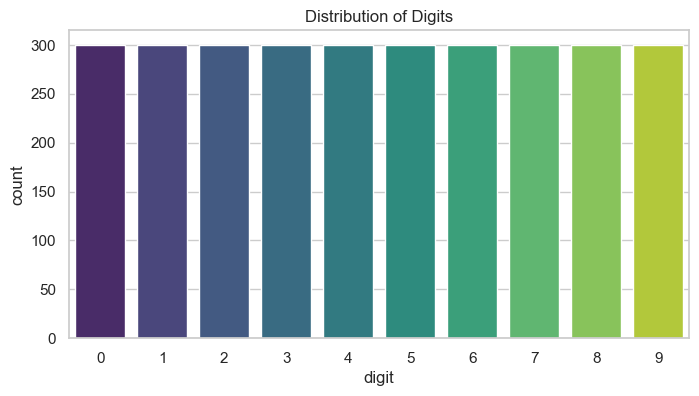

C:\Users\osama\AppData\Local\Temp\ipykernel_27352\2827604349.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='speaker', data=df, palette="pastel")


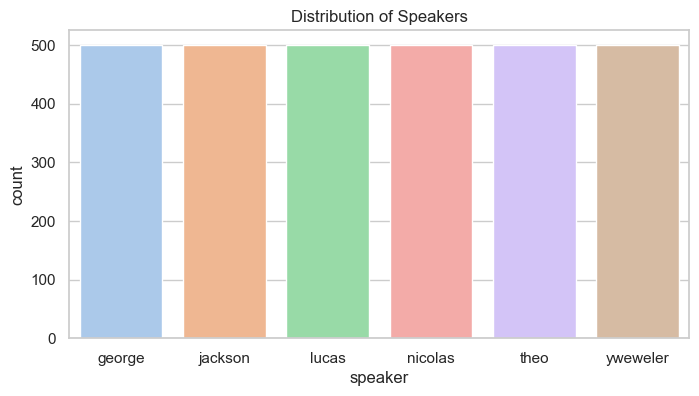

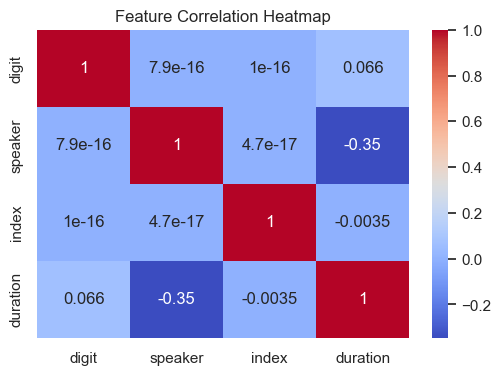

In [31]:
import os
import pandas as pd
import seaborn as sns

# 1-Loading files

files = [f for f in os.listdir(data_path) if f.endswith('.wav')]

# 2-Extracting metadata
data_info = []
for f in files:
    digit, speaker, idx = f.replace('.wav', '').split('_')
    path = os.path.join(data_path, f)
    duration = librosa.get_duration(path=path)
    data_info.append([f, int(digit), speaker, int(idx), duration])

df = pd.DataFrame(data_info, columns=["filename", "digit", "speaker", "index", "duration"])

# 3-Descriptive stats
print("🔢 General Stats:")
print(df[['digit', 'duration']].describe())

print("\n📊 Duration by Digit:")
print(df.groupby('digit')['duration'].agg(['mean', 'median', 'min', 'max', 'std']))

print("\n🧑 Duration by Speaker:")
print(df.groupby('speaker')['duration'].agg(['mean', 'median', 'min', 'max', 'std']))

# 4-Setting seaborn style
sns.set(style="whitegrid")

# Plot 1: Digit distribution
plt.figure(figsize=(8, 4))
sns.countplot(x='digit', data=df, palette="viridis")
plt.title('Distribution of Digits')
plt.show()

# Plot 2: Speaker distribution
plt.figure(figsize=(8, 4))
sns.countplot(x='speaker', data=df, palette="pastel")
plt.title('Distribution of Speakers')
plt.show()



# Plot 5: Correlation heatmap
df_encoded = df.copy()
df_encoded['speaker'] = df_encoded['speaker'].astype('category').cat.codes
numeric_df = df_encoded.drop(columns=['filename'])
plt.figure(figsize=(6, 4))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

#  Signal Envelope Extraction

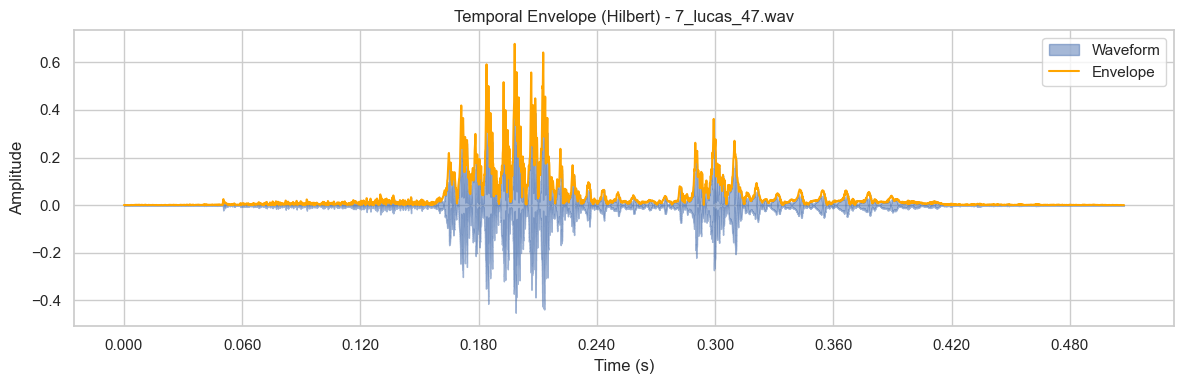

In [32]:
from scipy.signal import hilbert
import matplotlib.pyplot as plt
import numpy as np
import librosa.display

# 1-Loading one sample
data_path = 'free-spoken-digit-dataset/recordings'
filename = np.random.choice(os.listdir(data_path))
filepath = os.path.join(data_path, filename)
y, sr = librosa.load(filepath)
duration = librosa.get_duration(y=y, sr=sr)

# 2-Computing temporal envelope using Hilbert Transform
analytic_signal = hilbert(y)
envelope = np.abs(analytic_signal)

#3-Plotting waveform and envelope
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y, sr=sr, alpha=0.5, label='Waveform')
plt.plot(np.linspace(0, duration, len(envelope)), envelope, color='orange', label='Envelope')
plt.title(f"Temporal Envelope (Hilbert) - {filename}")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Time-Domain Features

🎧 File: 7_lucas_47.wav
📏 Duration: 0.51 sec
⚡ RMS Energy (mean): 0.0407
🎚️ Zero-Crossing Rate (mean): 0.1011
🔁 Autocorr[0:5]: [40.621037 39.82543  37.628727 34.517838 31.068302]


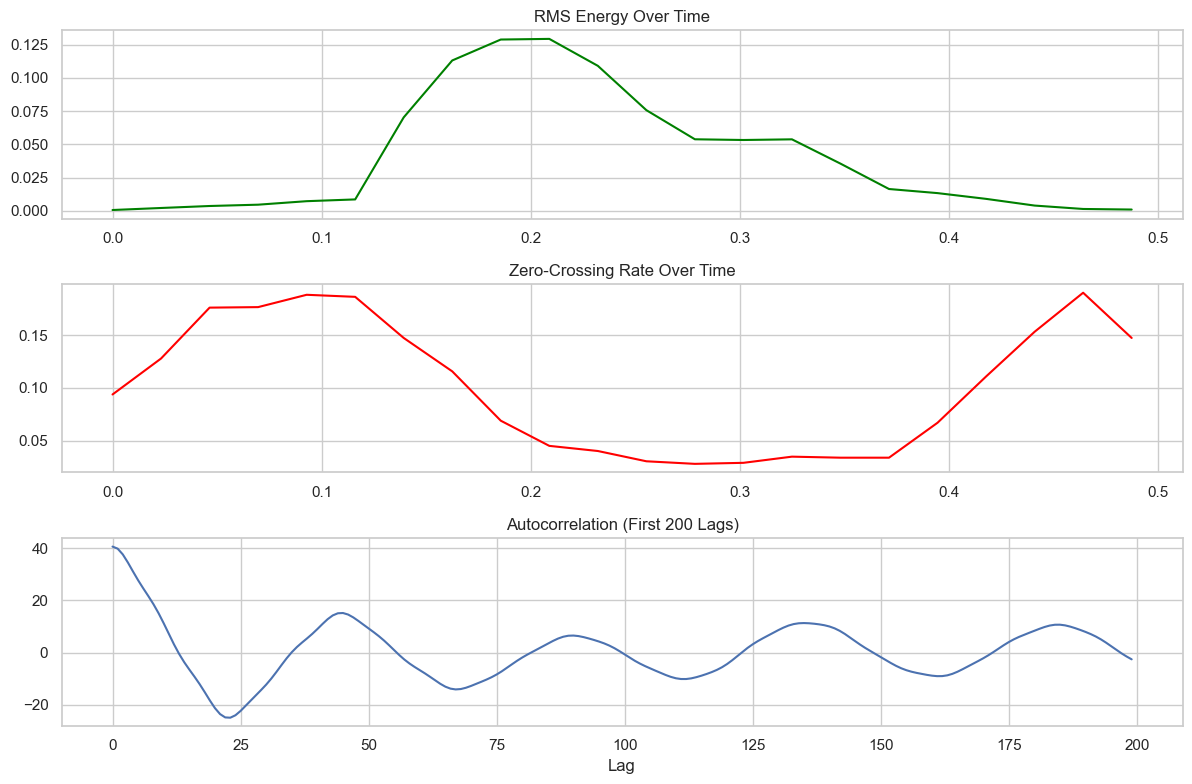

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display

# 1-Loading the same or another audio sample
y, sr = librosa.load(filepath)
duration = librosa.get_duration(y=y, sr=sr)

# 2- extracting Time-domain features
rms = librosa.feature.rms(y=y)[0]
zcr = librosa.feature.zero_crossing_rate(y=y)[0]
times = librosa.times_like(rms, sr=sr)

# 4-Autocorrelation
autocorr = np.correlate(y, y, mode='full')
autocorr = autocorr[autocorr.size // 2:]

# 5-Printing descriptive temporal stats
print(f"🎧 File: {filename}")
print(f"📏 Duration: {duration:.2f} sec")
print(f"⚡ RMS Energy (mean): {np.mean(rms):.4f}")
print(f"🎚️ Zero-Crossing Rate (mean): {np.mean(zcr):.4f}")
print(f"🔁 Autocorr[0:5]: {autocorr[:5]}")

# 6-Plotting features showing temporal patterns
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(times, rms, color='green')
plt.title("RMS Energy Over Time")

plt.subplot(3, 1, 2)
plt.plot(times, zcr, color='red')
plt.title("Zero-Crossing Rate Over Time")

plt.subplot(3, 1, 3)
plt.plot(autocorr[:200])
plt.title("Autocorrelation (First 200 Lags)")
plt.xlabel("Lag")

plt.tight_layout()
plt.show()


# Filtering Techniques

Loaded: free-spoken-digit-dataset/recordings\0_george_0.wav


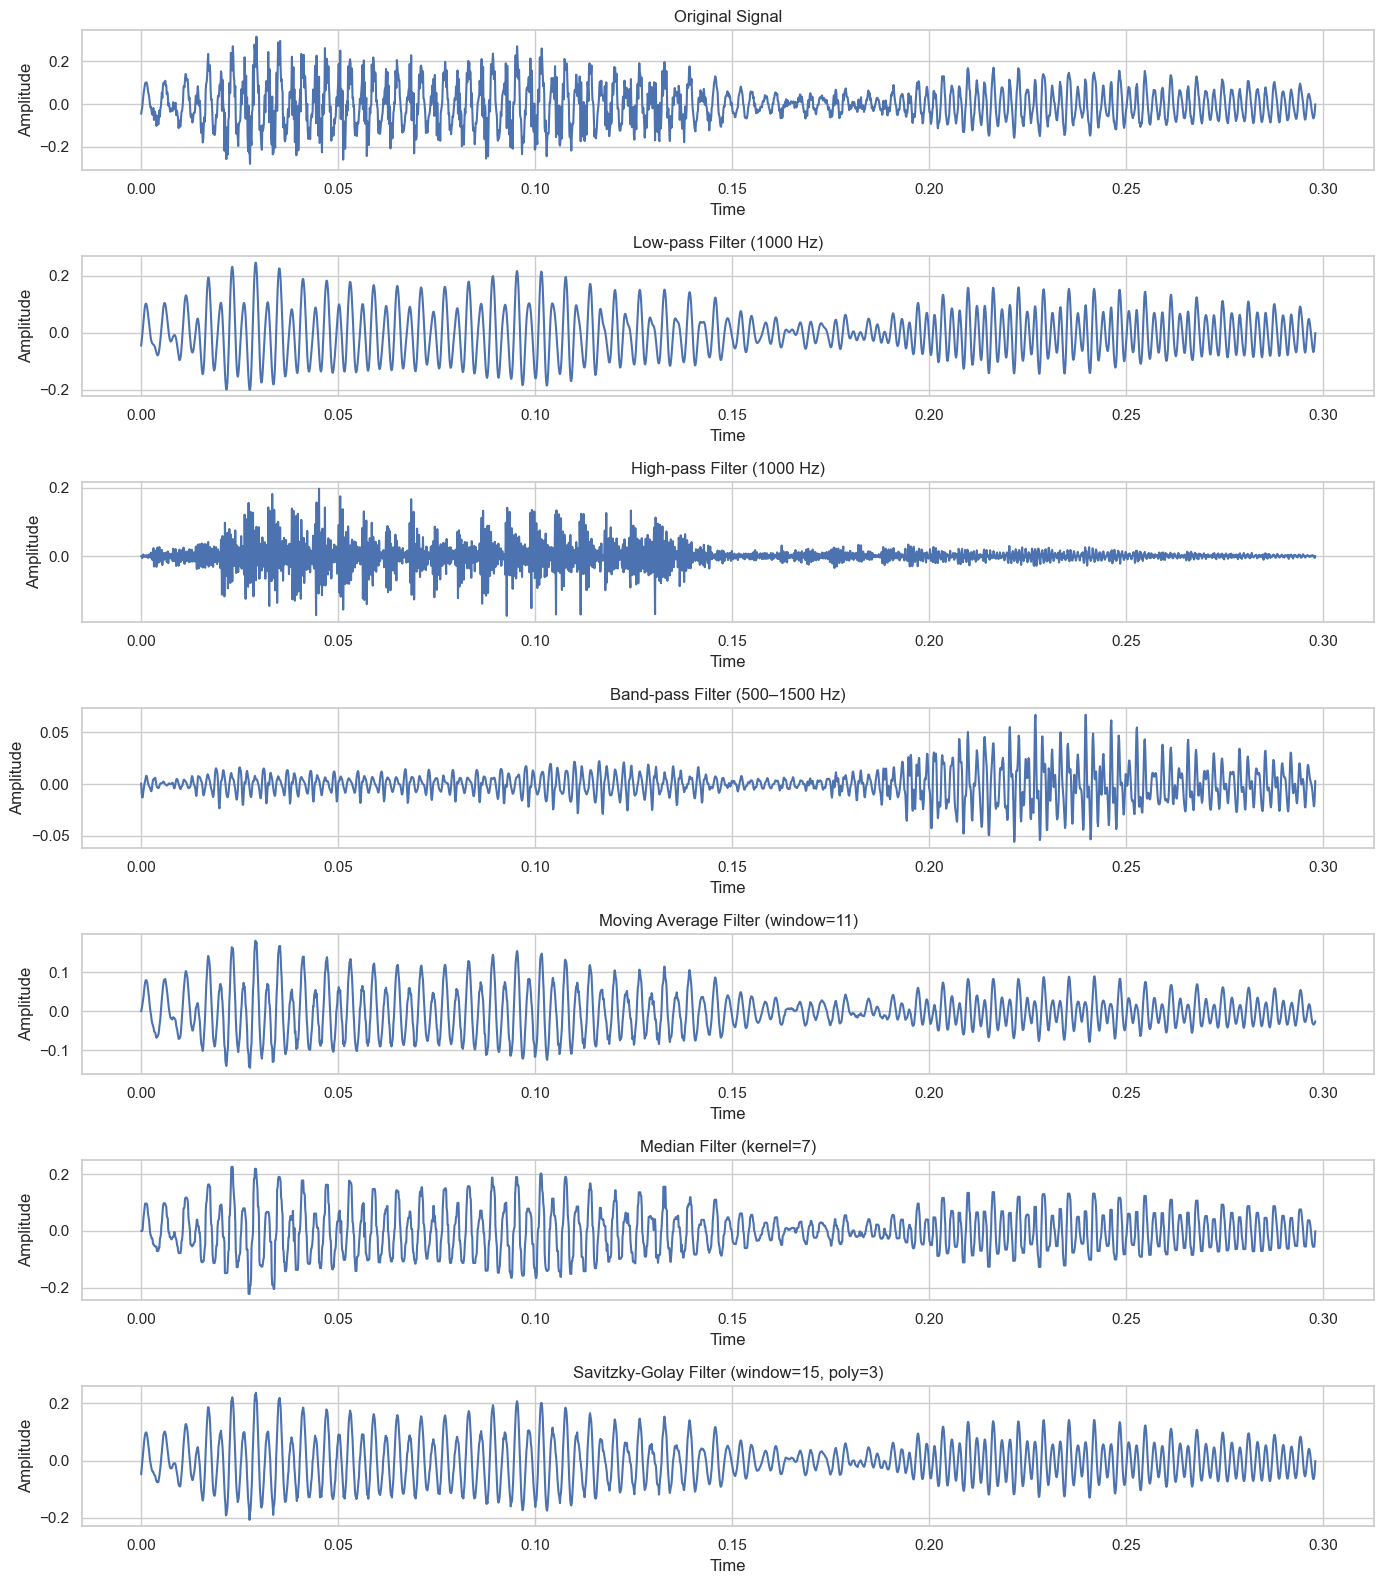

In [34]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import butter, filtfilt, medfilt, savgol_filter

# 1-Loading audio 
data_path = 'free-spoken-digit-dataset/recordings'
files = [f for f in os.listdir(data_path) if f.endswith('.wav')]
file_path = os.path.join(data_path, files[0])
signal, sr = librosa.load(file_path, sr=None)
print(f"Loaded: {file_path}")

# 2-Time axis
time = np.linspace(0, len(signal)/sr, len(signal))

# 3-Butterworth filter 
def butter_filter(data, cutoff, fs, order, btype):
    nyq = 0.5 * fs
    norm_cutoff = [f / nyq for f in cutoff] if isinstance(cutoff, (list, tuple)) else cutoff / nyq
    b, a = butter(order, norm_cutoff, btype=btype, analog=False)
    return filtfilt(b, a, data)

# 4-Moving average 
def moving_average(data, window_size=11):
    return np.convolve(data, np.ones(window_size)/window_size, mode='same')

# 5-Applying all filters 
filtered_signals = {
    "Original Signal": signal,
    "Low-pass Filter (1000 Hz)": butter_filter(signal, 1000, sr, order=5, btype='low'),
    "High-pass Filter (1000 Hz)": butter_filter(signal, 1000, sr, order=5, btype='high'),
    "Band-pass Filter (500–1500 Hz)": butter_filter(signal, [500, 1500], sr, order=4, btype='band'),
    "Moving Average Filter (window=11)": moving_average(signal, 11),
    "Median Filter (kernel=7)": medfilt(signal, kernel_size=7),
    "Savitzky-Golay Filter (window=15, poly=3)": savgol_filter(signal, window_length=15, polyorder=3),
}

# 6-Plotting with shared time axis 
plt.figure(figsize=(14, 16))

for i, (title, y) in enumerate(filtered_signals.items(), 1):
    plt.subplot(len(filtered_signals), 1, i)
    plt.plot(time, y)
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.grid(True)

plt.tight_layout()
plt.show()

# Frequency-Domain Analysis

import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display

# Set dataset path and list files

In [47]:
DATASET_PATH = 'free-spoken-digit-dataset/recordings'

# List all WAV files in the dataset
all_files = [f for f in os.listdir(DATASET_PATH) if f.endswith('.wav')]
print(f"Total number of audio files: {len(all_files)}")
print("Sample file names:")
print(all_files[:10])  # Show a few file names

Total number of audio files: 3000
Sample file names:
['0_george_0.wav', '0_george_1.wav', '0_george_10.wav', '0_george_11.wav', '0_george_12.wav', '0_george_13.wav', '0_george_14.wav', '0_george_15.wav', '0_george_16.wav', '0_george_17.wav']


# File name format
File names follow this pattern: {digit}_{speaker}_{index}.wav. We'll split them to extract this info for each file.

In [49]:
# Split filenames to extract digit, speaker, and index
data_info = [f.replace('.wav', '').split('_') for f in all_files]
df_info = pd.DataFrame(data_info, columns=['digit', 'speaker', 'index'])
df_info['filename'] = all_files
df_info['digit'] = df_info['digit'].astype(int)
df_info['index'] = df_info['index'].astype(int)

# Show basic info
df_info.head()


,digit,speaker,index,filename
0,0,george,0,0_george_0.wav
1,0,george,1,0_george_1.wav
2,0,george,10,0_george_10.wav
3,0,george,11,0_george_11.wav
4,0,george,12,0_george_12.wav


# Check number of samples per digit and speaker

In [51]:
# Count of each digit
print("Number of recordings per digit:")
print(df_info['digit'].value_counts().sort_index())

# Count of each speaker
print("\nNumber of recordings per speaker:")
print(df_info['speaker'].value_counts())


Number of recordings per digit:
digit
0    300
1    300
2    300
3    300
4    300
5    300
6    300
7    300
8    300
9    300
Name: count, dtype: int64

Number of recordings per speaker:
speaker
george      500
jackson     500
lucas       500
nicolas     500
theo        500
yweweler    500
Name: count, dtype: int64


 # Load one example file
 Let’s load an audio sample to check its sample rate, duration, and waveform. We'll also plot it.

Sample Rate: 8000 Hz
Audio duration: 0.30 seconds


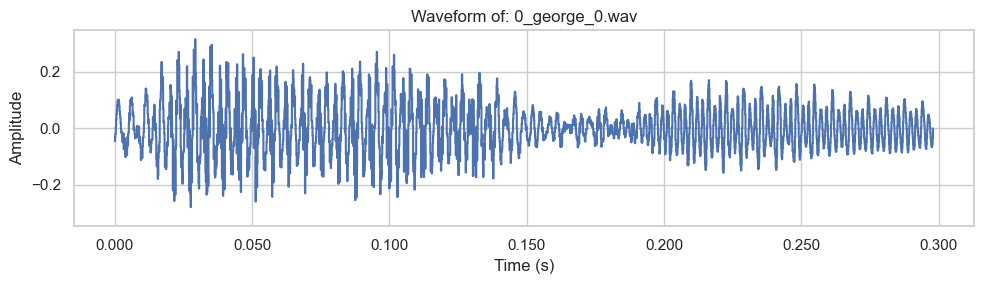

In [53]:
# Load one audio file
sample_file = os.path.join(DATASET_PATH, all_files[0])
y, sr = librosa.load(sample_file, sr=None)  # sr=None keeps original sample rate

print(f"Sample Rate: {sr} Hz")
print(f"Audio duration: {len(y)/sr:.2f} seconds")

# Plot waveform
plt.figure(figsize=(10, 3))
librosa.display.waveshow(y, sr=sr)
plt.title(f"Waveform of: {all_files[0]}")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()

# Show spectrogram of the same file
A spectrogram shows how frequency content changes over time. It's useful to "see" the sound.

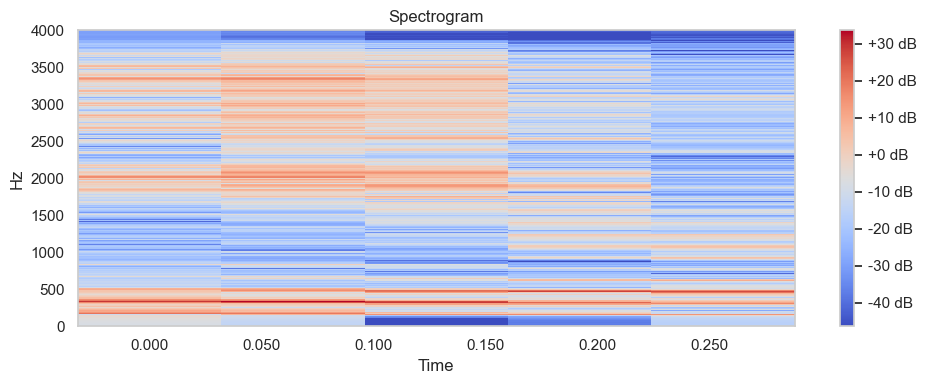

In [55]:
# Create spectrogram using STFT
D = librosa.stft(y)
S_db = librosa.amplitude_to_db(abs(D))

plt.figure(figsize=(10, 4))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar(format='%+2.0f dB')
plt.title("Spectrogram")
plt.tight_layout()
plt.show()

# Create summary DataFrame for all files
A summary table with file name, digit, speaker, duration, etc.

In [57]:
# Function to get duration of each file
def get_duration(file):
    y, sr = librosa.load(os.path.join(DATASET_PATH, file), sr=None)
    return len(y) / sr

df_info['duration_sec'] = df_info['filename'].apply(get_duration)
#df_info.head()
display(df_info)

,digit,speaker,index,filename,duration_sec
0,0,george,0,0_george_0.wav,0.298000
1,0,george,1,0_george_1.wav,0.590875
2,0,george,10,0_george_10.wav,0.744750
3,0,george,11,0_george_11.wav,0.457625
4,0,george,12,0_george_12.wav,0.506250
...,...,...,...,...,...
2995,9,yweweler,5,9_yweweler_5.wav,0.359625
2996,9,yweweler,6,9_yweweler_6.wav,0.347250
2997,9,yweweler,7,9_yweweler_7.wav,0.351875
2998,9,yweweler,8,9_yweweler_8.wav,0.395500


# Plot waveforms of multiple samples

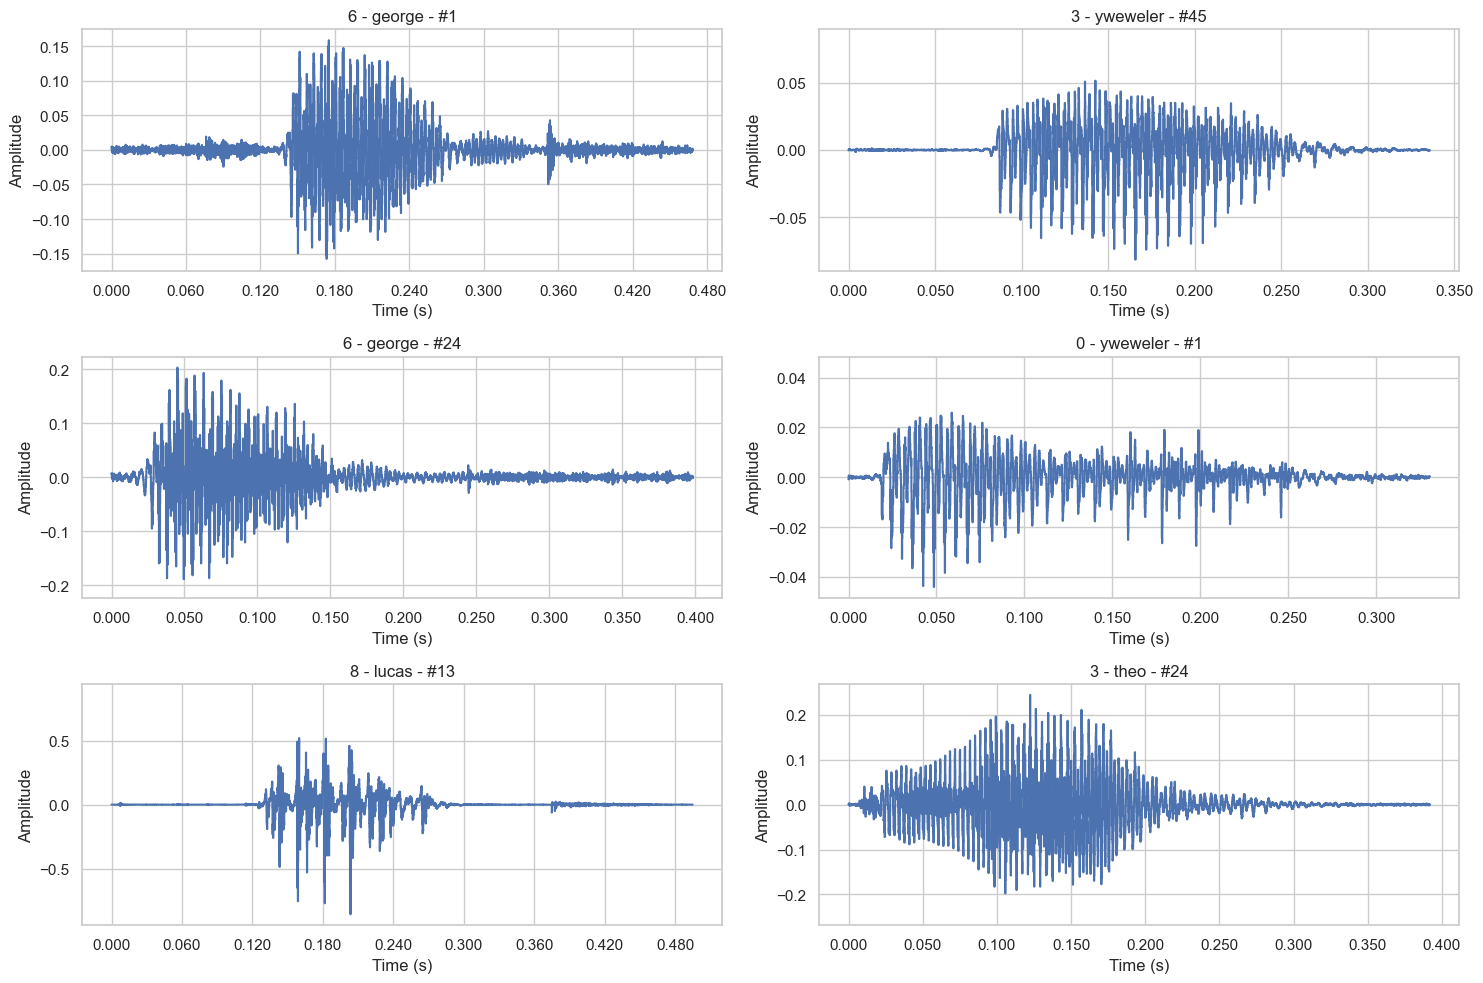

In [59]:
import random

# 6 random samples
samples = df_info.sample(6, random_state=42).reset_index(drop=True)

# Plot waveforms
plt.figure(figsize=(15, 10))
for i in range(len(samples)):
    file_path = os.path.join(DATASET_PATH, samples.loc[i, 'filename'])
    y, sr = librosa.load(file_path, sr=None)

    plt.subplot(3, 2, i + 1)
    librosa.display.waveshow(y, sr=sr)
    plt.title(f"{samples.loc[i, 'digit']} - {samples.loc[i, 'speaker']} - #{samples.loc[i, 'index']}")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()

# Listen to audio samples

In [61]:
from IPython.display import Audio, display

for i in range(len(samples)):
    file_path = os.path.join(DATASET_PATH, samples.loc[i, 'filename'])
    y, sr = librosa.load(file_path, sr=None)
    print(f"{samples.loc[i, 'digit']} - {samples.loc[i, 'speaker']} - #{samples.loc[i, 'index']}")
    display(Audio(y, rate=sr))


6 - george - #1


3 - yweweler - #45


6 - george - #24


0 - yweweler - #1


8 - lucas - #13


3 - theo - #24


# Analyze basic stats per speaker
This shows average duration and amplitude range for each speaker, to help you compare how they speak.

In [63]:
def get_stats(file):
    y, sr = librosa.load(os.path.join(DATASET_PATH, file), sr=None)
    duration = len(y) / sr
    amplitude_range = np.max(y) - np.min(y)
    return pd.Series([duration, amplitude_range])

# Apply to all files
df_info[['duration_sec', 'amplitude_range']] = df_info['filename'].apply(get_stats)

# Group by speaker
speaker_stats = df_info.groupby('speaker')[['duration_sec', 'amplitude_range']].mean()
speaker_stats

,duration_sec,amplitude_range
speaker,,
george,0.441717,0.623496
jackson,0.516460,0.855451
lucas,0.574211,0.833508
nicolas,0.349188,0.435047
theo,0.388862,0.100830
yweweler,0.354168,0.123082


# Visualize duration across digits or speakers
Let’s see how consistent durations are for each digit or speaker.

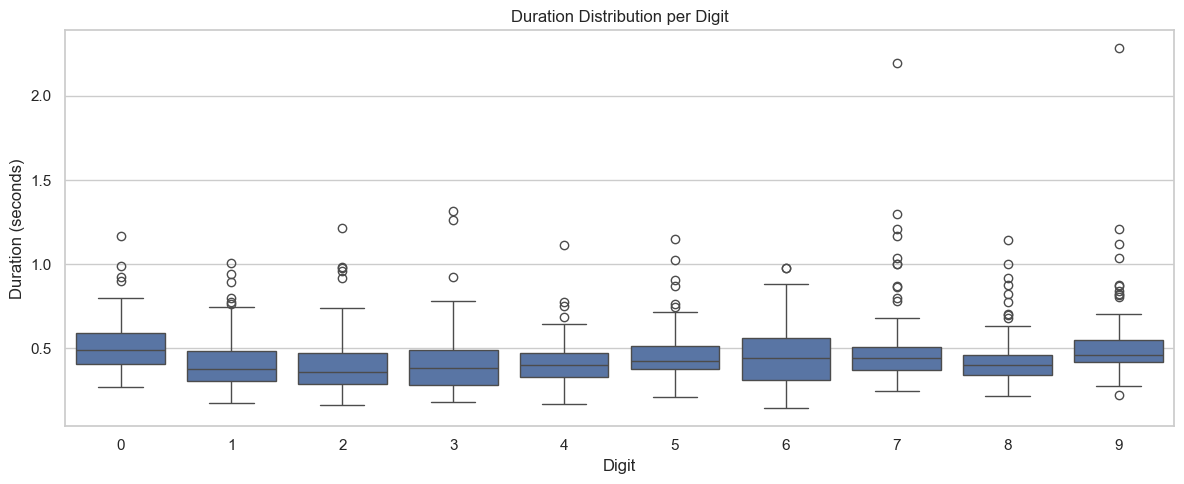

In [65]:
import seaborn as sns

plt.figure(figsize=(12, 5))
sns.boxplot(data=df_info, x='digit', y='duration_sec')
plt.title("Duration Distribution per Digit")
plt.xlabel("Digit")
plt.ylabel("Duration (seconds)")
plt.tight_layout()
plt.show()

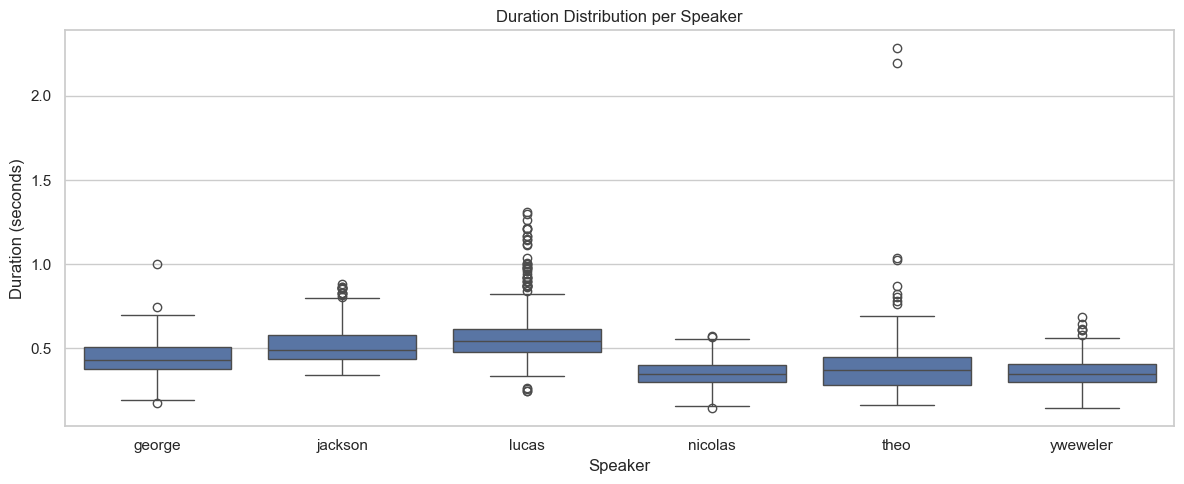

In [67]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=df_info, x='speaker', y='duration_sec')
plt.title("Duration Distribution per Speaker")
plt.xlabel("Speaker")
plt.ylabel("Duration (seconds)")
plt.tight_layout()
plt.show()

# Frequency-Domain Analysis

In [71]:
import os
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import pandas as pd
import scipy.signal

DATASET_PATH = 'free-spoken-digit-dataset/recordings'

files = [f for f in os.listdir(DATASET_PATH) if f.endswith('.wav')]
df = pd.DataFrame([{
    'file': f,
    'digit': int(f.split('_')[0]),
    'speaker': f.split('_')[1],
    'index': int(f.split('_')[2].replace('.wav', '')),
    'path': os.path.join(DATASET_PATH, f)
} for f in files])


# STFT – View how frequencies change over time

STFT helps us break the audio into short parts and check how frequencies behave at each time step.

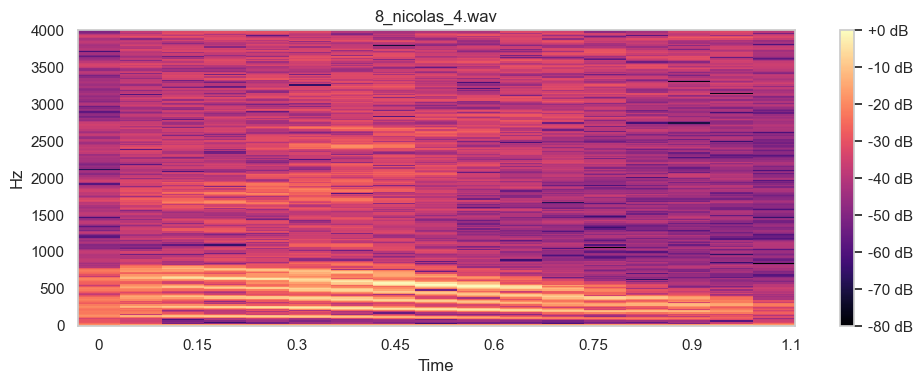

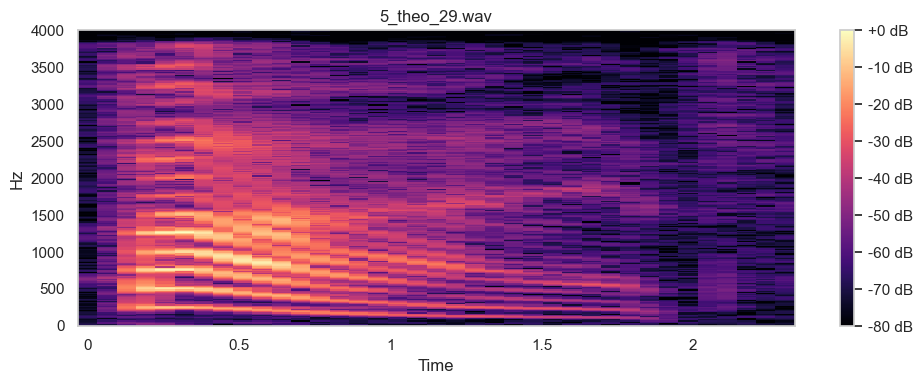

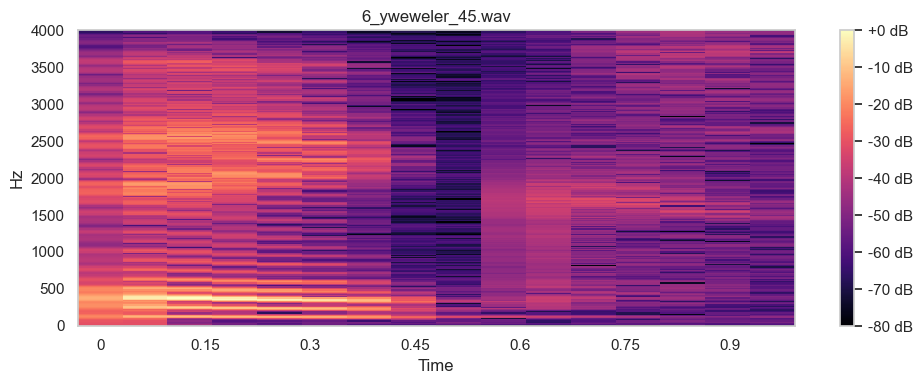

In [73]:
def show_stft(file):
    y, sr = librosa.load(file, sr=None)
    S = librosa.stft(y, n_fft=512, hop_length=128, window='hann')
    S_db = librosa.amplitude_to_db(np.abs(S), ref=np.max)

    plt.figure(figsize=(10, 4))
    librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar(format='%+2.0f dB')
    plt.title(os.path.basename(file))
    plt.tight_layout()
    plt.show()

# Show 3 examples
for path in df.sample(3)['path']:
    show_stft(path)


# MFCC – Mimics how humans hear sound
MFCCs give a summary of how we perceive the sound. They're used a lot in speech recognition.

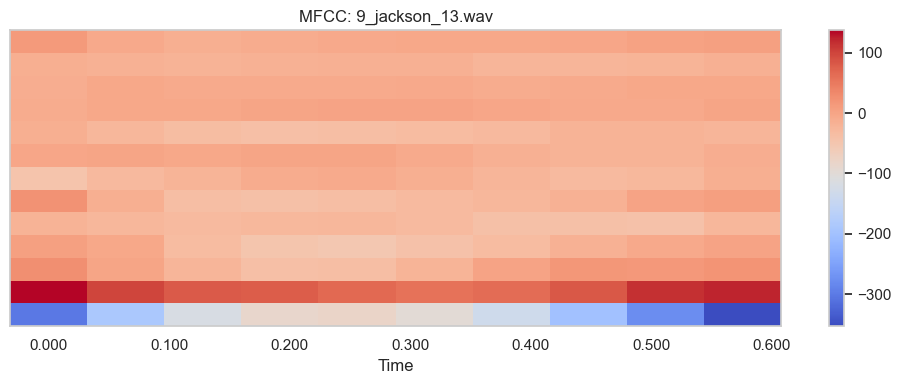

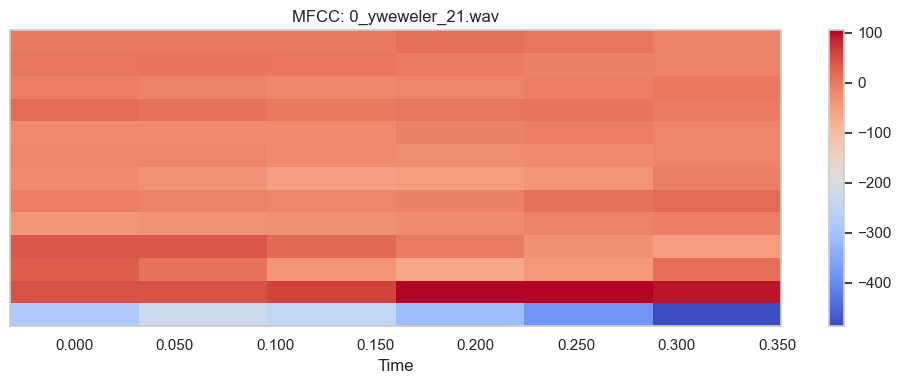

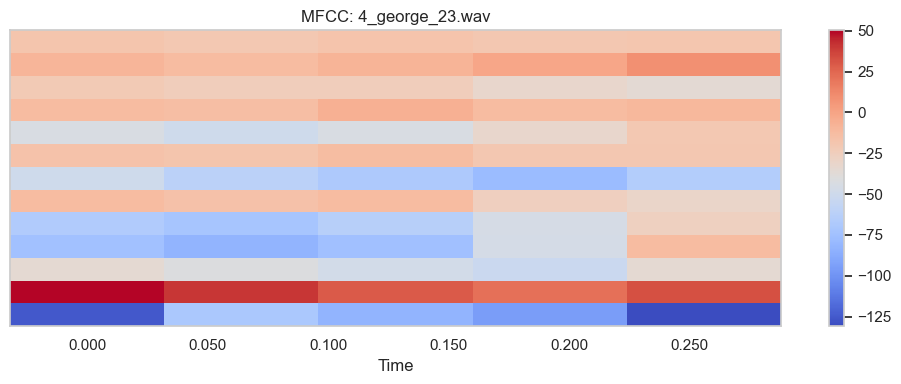

In [75]:
def show_mfcc(file):
    y, sr = librosa.load(file, sr=None)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mfcc, sr=sr, x_axis='time')
    plt.colorbar()
    plt.title(f"MFCC: {os.path.basename(file)}")
    plt.tight_layout()
    plt.show()

# Show 3 examples
for path in df.sample(3)['path']:
    show_mfcc(path)

# Spectral Centroid – Shows brightness of the sound
This shows where the center of the frequencies is. Higher values mean sharper or brighter sounds.

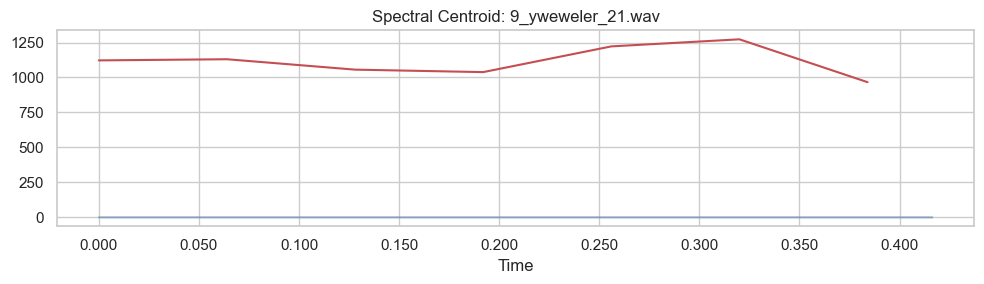

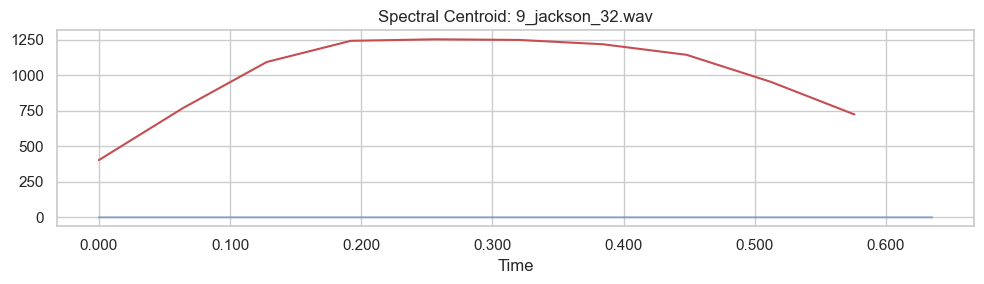

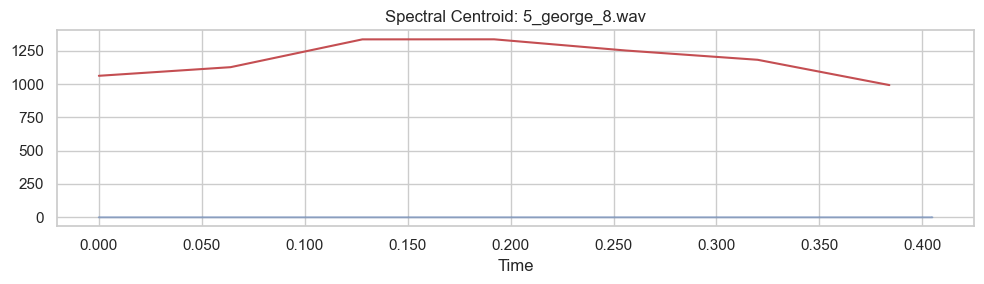

In [77]:
def show_centroid(file):
    y, sr = librosa.load(file, sr=None)
    centroid = librosa.feature.spectral_centroid(y=y, sr=sr)[0]
    t = librosa.frames_to_time(range(len(centroid)), sr=sr)

    plt.figure(figsize=(10, 3))
    librosa.display.waveshow(y, sr=sr, alpha=0.5)
    plt.plot(t, centroid, color='r')
    plt.title(f"Spectral Centroid: {os.path.basename(file)}")
    plt.tight_layout()
    plt.show()

for path in df.sample(3)['path']:
    show_centroid(path)


#  Spectral Bandwidth – How wide the sound is
It tells us how spread out the frequencies are. Wider sounds often include more noise or consonants.

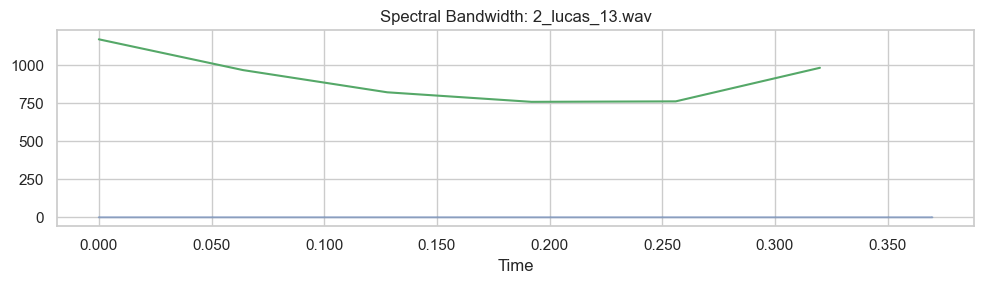

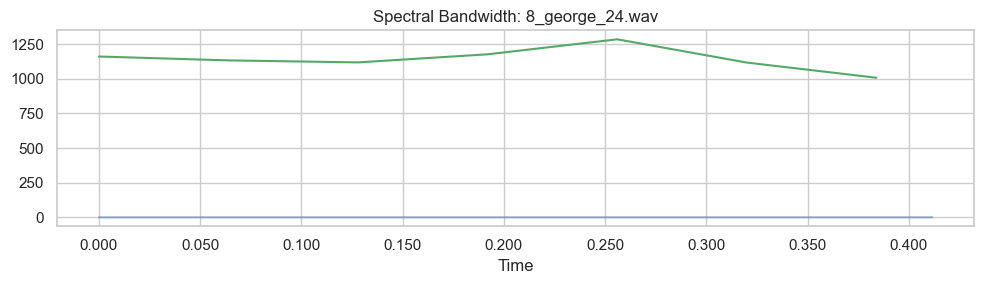

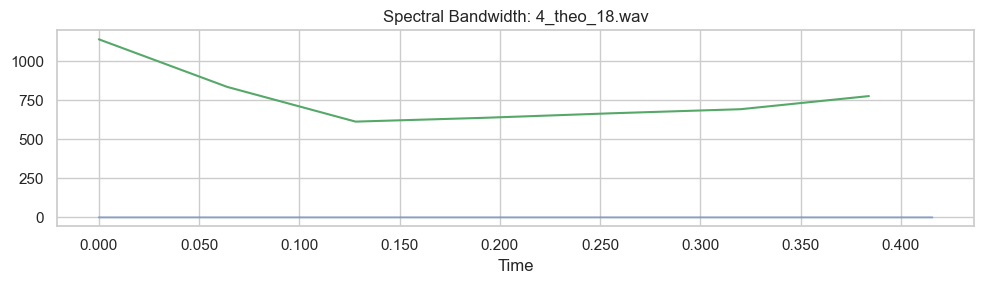

In [79]:
def show_bandwidth(file):
    y, sr = librosa.load(file, sr=None)
    bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)[0]
    t = librosa.frames_to_time(range(len(bandwidth)), sr=sr)

    plt.figure(figsize=(10, 3))
    librosa.display.waveshow(y, sr=sr, alpha=0.5)
    plt.plot(t, bandwidth, color='g')
    plt.title(f"Spectral Bandwidth: {os.path.basename(file)}")
    plt.tight_layout()
    plt.show()

for path in df.sample(3)['path']:
    show_bandwidth(path)

# Spectral Rolloff – Energy cutoff point
This shows the frequency below which most of the energy is found. Helps know if sound is low-pitched or high-pitched.

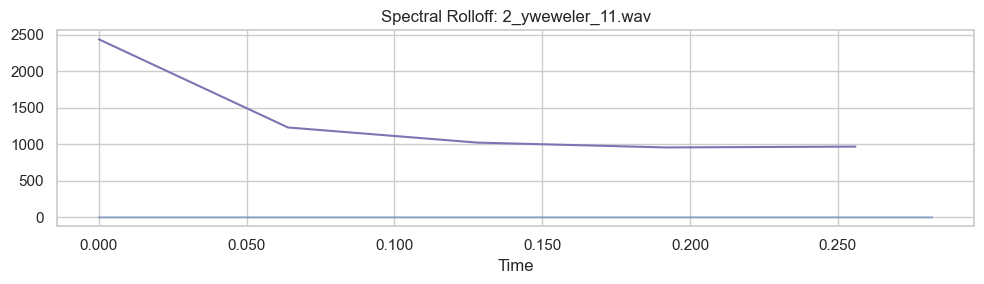

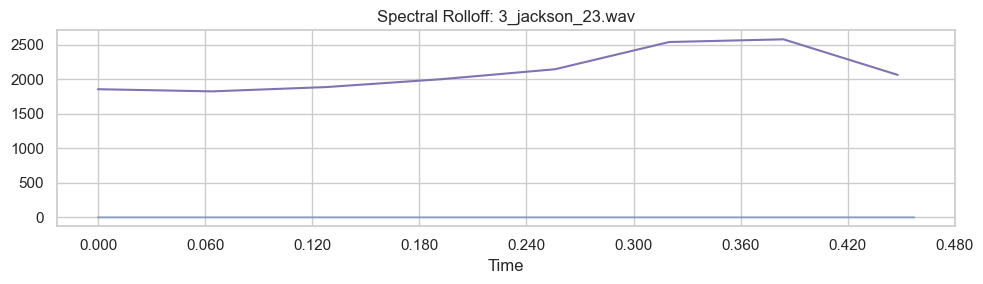

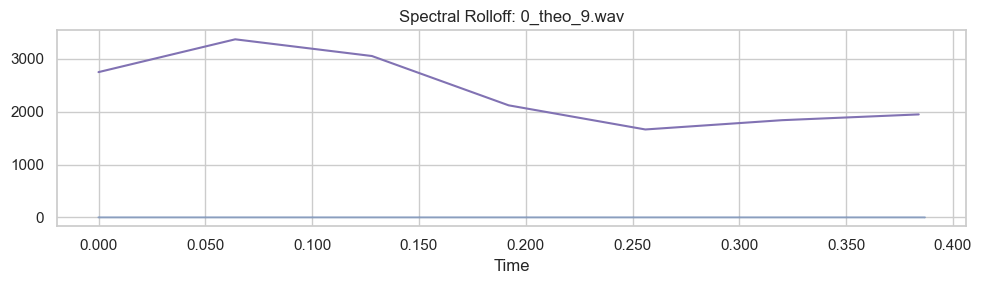

In [81]:
def show_rolloff(file):
    y, sr = librosa.load(file, sr=None)
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)[0]
    t = librosa.frames_to_time(range(len(rolloff)), sr=sr)

    plt.figure(figsize=(10, 3))
    librosa.display.waveshow(y, sr=sr, alpha=0.5)
    plt.plot(t, rolloff, color='m')
    plt.title(f"Spectral Rolloff: {os.path.basename(file)}")
    plt.tight_layout()
    plt.show()

for path in df.sample(3)['path']:
    show_rolloff(path)


# Harmonic-to-Noise Ratio (HNR) – Tonal vs noisy sound
This tells us how much of the sound is clean and smooth (like vowels) vs rough or noisy (like ‘s’ or ‘f’).

In [83]:
def get_hnr(file):
    y, sr = librosa.load(file, sr=None)
    try:
        f0, _, probs = librosa.pyin(y, fmin=50, fmax=500)
        hnr = np.mean(probs[~np.isnan(probs)])
    except:
        hnr = None
    print(f"HNR: {os.path.basename(file)} = {hnr}")

for path in df.sample(3)['path']:
    get_hnr(path)


HNR: 5_jackson_10.wav = 0.030584177848677712
HNR: 9_lucas_29.wav = 0.012244606636551756
HNR: 0_yweweler_13.wav = 0.16683740213697354


# Formants – Shape of the mouth/vowel sound
Formants help tell what vowel was said. Different digits have different vowels → different formants.

In [85]:
def get_formants(file):
    y, sr = librosa.load(file, sr=None)
    y = scipy.signal.lfilter([1, -0.97], 1, y)
    a = librosa.lpc(y, order=12)
    roots = np.roots(a)
    roots = [r for r in roots if np.imag(r) >= 0]
    angz = np.arctan2(np.imag(roots), np.real(roots))
    formants = sorted(angz * (sr / (2 * np.pi)))
    print(f"Formants: {os.path.basename(file)} =", formants[:3])

for path in df.sample(3)['path']:
    get_formants(path)


Formants: 7_jackson_9.wav = [np.float64(531.5072499953446), np.float64(712.5421706328896), np.float64(1579.5386141578056)]
Formants: 6_theo_20.wav = [np.float64(400.88004803720867), np.float64(939.4303238360461), np.float64(1750.9765535613515)]
Formants: 5_lucas_20.wav = [np.float64(644.078443380826), np.float64(675.1186351705903), np.float64(1459.3479164251678)]


# DFT Issues: Windowing + Zero-Padding

## Windowing – Reduces distortion in spectrum
A window makes the signal smoother so the spectrum looks better. Without it, we get “leakage” or false spikes.

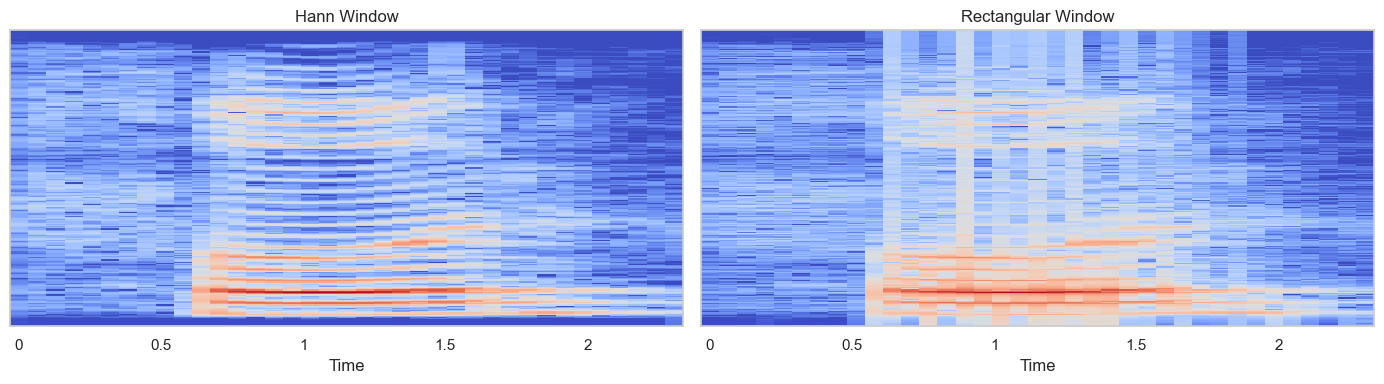

In [87]:
def compare_windows(file):
    y, sr = librosa.load(file, sr=None)
    hann = librosa.stft(y, n_fft=512, hop_length=128, window='hann')
    rect = librosa.stft(y, n_fft=512, hop_length=128, window='boxcar')

    plt.figure(figsize=(14, 4))

    plt.subplot(1, 2, 1)
    librosa.display.specshow(librosa.amplitude_to_db(np.abs(hann)), sr=sr, x_axis='time')
    plt.title("Hann Window")

    plt.subplot(1, 2, 2)
    librosa.display.specshow(librosa.amplitude_to_db(np.abs(rect)), sr=sr, x_axis='time')
    plt.title("Rectangular Window")
    plt.tight_layout()
    plt.show()

compare_windows(df.sample(1)['path'].iloc[0])

## Zero Padding – Improves frequency detail
Adding zeros helps make the frequency display smoother with more detail.

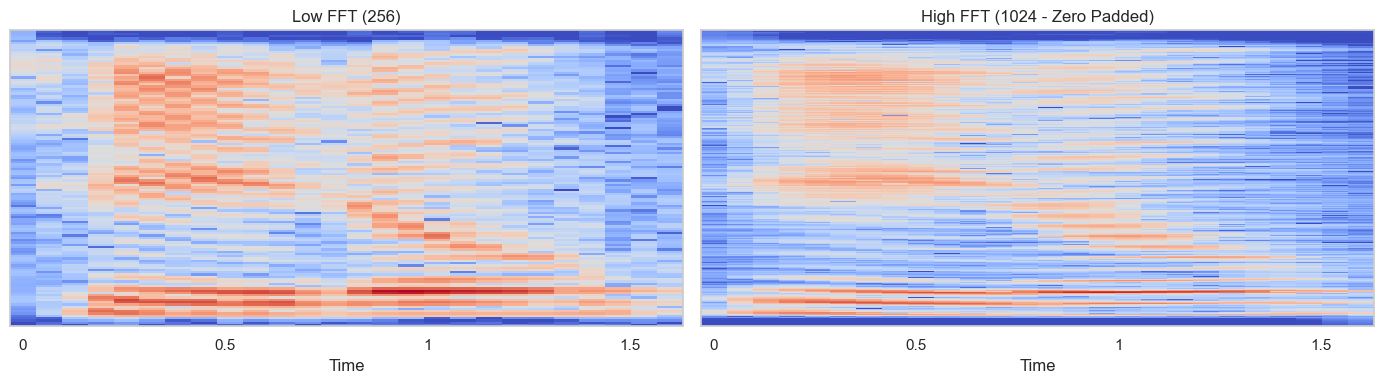

In [89]:
def compare_zero_padding(file):
    y, sr = librosa.load(file, sr=None)
    low_res = librosa.stft(y, n_fft=256, hop_length=128)
    high_res = librosa.stft(y, n_fft=1024, hop_length=128)

    plt.figure(figsize=(14, 4))

    plt.subplot(1, 2, 1)
    librosa.display.specshow(librosa.amplitude_to_db(np.abs(low_res)), sr=sr, x_axis='time')
    plt.title("Low FFT (256)")

    plt.subplot(1, 2, 2)
    librosa.display.specshow(librosa.amplitude_to_db(np.abs(high_res)), sr=sr, x_axis='time')
    plt.title("High FFT (1024 - Zero Padded)")
    plt.tight_layout()
    plt.show()

compare_zero_padding(df.sample(1)['path'].iloc[0])


# Why Combine the Features?
Each feature tells us something different about the sound:

MFCCs → what the ear hears

Spectral features → how energy is spread

Formants → vowel and mouth shape

HNR → whether the sound is smooth or noisy

By combining them into one table, we help the classifier learn patterns better.

### Extract All Features for Each File
This code gets everything in one go:

MFCCs

Spectral Centroid, Bandwidth, Rolloff

Formants

Harmonic-to-Noise Ratio

In [93]:
def extract_frequency_features(file, n_mfcc=13):
    y, sr = librosa.load(file, sr=None)

    # MFCC
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    mfcc_mean = np.mean(mfcc, axis=1)

    # Spectral features
    centroid = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))
    bandwidth = np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr))
    rolloff = np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr, roll_percent=0.85))

    # Formants
    y_pre = scipy.signal.lfilter([1, -0.97], 1, y)
    a = librosa.lpc(y_pre, order=12)
    roots = np.roots(a)
    roots = [r for r in roots if np.imag(r) >= 0]
    angz = np.arctan2(np.imag(roots), np.real(roots))
    formants = sorted(angz * (sr / (2 * np.pi)))
    f1, f2, f3 = (formants + [None, None, None])[:3]

    # Harmonic-to-noise ratio
    try:
        f0, _, probs = librosa.pyin(y, fmin=50, fmax=500)
        hnr = np.mean(probs[~np.isnan(probs)])
    except:
        hnr = None

    features = {
        'file': os.path.basename(file),
        'centroid': centroid,
        'bandwidth': bandwidth,
        'rolloff': rolloff,
        'formant_1': f1,
        'formant_2': f2,
        'formant_3': f3,
        'hnr': hnr
    }

    for i in range(n_mfcc):
        features[f'mfcc_{i+1}'] = mfcc_mean[i]

    return features


In [95]:
all_features = []

for _, row in df.iterrows():
    feats = extract_frequency_features(row['path'])
    feats['digit'] = row['digit']
    feats['speaker'] = row['speaker']
    all_features.append(feats)

df_all_features = pd.DataFrame(all_features)
df_all_features.head()

C:\Users\osama\anaconda3\envs\Osama\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1933
  warnings.warn(
C:\Users\osama\anaconda3\envs\Osama\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1399
  warnings.warn(
C:\Users\osama\anaconda3\envs\Osama\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1876
  warnings.warn(
C:\Users\osama\anaconda3\envs\Osama\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1983
  warnings.warn(
C:\Users\osama\anaconda3\envs\Osama\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=2033
  warnings.warn(
C:\Users\osama\anaconda3\envs\Osama\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=19

,file,centroid,bandwidth,rolloff,formant_1,formant_2,formant_3,hnr,mfcc_1,mfcc_2,...,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,mfcc_13,digit,speaker
0,0_george_0.wav,1482.713480,1113.537875,2836.718750,391.381954,1203.474380,1988.788646,0.151652,-164.544647,2.768874,...,-27.450354,-39.704735,-28.177942,-30.976017,7.688464,-30.494644,7.865952,-9.793325,0,george
1,0_george_1.wav,1080.441299,981.904973,2226.562500,414.318994,1353.694093,1841.778588,0.163678,-250.517212,33.151550,...,-50.474072,-43.294243,-27.839779,-39.000805,-3.448081,-32.986031,-9.017045,-17.313055,0,george
2,0_george_10.wav,1337.613723,984.444341,2504.231771,0.000000,438.817357,1445.823311,0.224885,-312.191864,11.199821,...,-36.116360,-24.461546,-35.563080,-33.041653,-11.725566,-32.810059,-0.262404,-14.975568,0,george
3,0_george_11.wav,1309.455581,1034.497346,2563.476562,0.000000,448.627228,1385.306351,0.348342,-262.359131,7.685690,...,-35.234798,-32.962082,-31.147699,-36.620861,-9.146376,-30.018364,1.787618,-14.029257,0,george
4,0_george_12.wav,1247.090965,990.666593,2406.250000,443.626196,1348.431016,1883.629729,0.290103,-249.161102,12.089952,...,-37.469681,-34.216095,-30.324535,-40.210144,-7.836192,-34.687336,-2.708799,-17.883245,0,george


### Check for Missing Values

In [96]:
df_all_features.isnull().sum()

file         0
centroid     0
bandwidth    0
rolloff      0
formant_1    0
formant_2    0
formant_3    0
hnr          0
mfcc_1       0
mfcc_2       0
mfcc_3       0
mfcc_4       0
mfcc_5       0
mfcc_6       0
mfcc_7       0
mfcc_8       0
mfcc_9       0
mfcc_10      0
mfcc_11      0
mfcc_12      0
mfcc_13      0
digit        0
speaker      0
dtype: int64

## Save to CSV

In [97]:
df_all_features.to_csv("frequency_domain_features.csv", index=False)
print("Saved as 'frequency_domain_features.csv'")

Saved as 'frequency_domain_features.csv'


# Wavelet Transform Analysis 

Total number of audio files: 3000
Sample file names:
['0_george_0.wav', '0_george_1.wav', '0_george_10.wav', '0_george_11.wav', '0_george_12.wav', '0_george_13.wav', '0_george_14.wav', '0_george_15.wav', '0_george_16.wav', '0_george_17.wav']
Sample Rate: 8000 Hz
Audio duration: 0.30 seconds


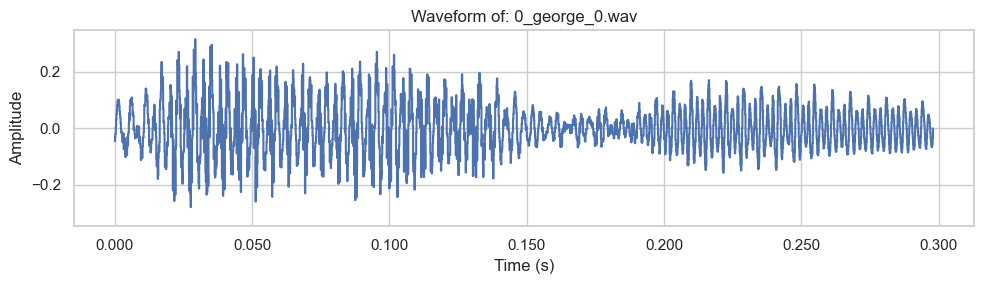

Wavelet features extracted and saved to wavelet_features.csv


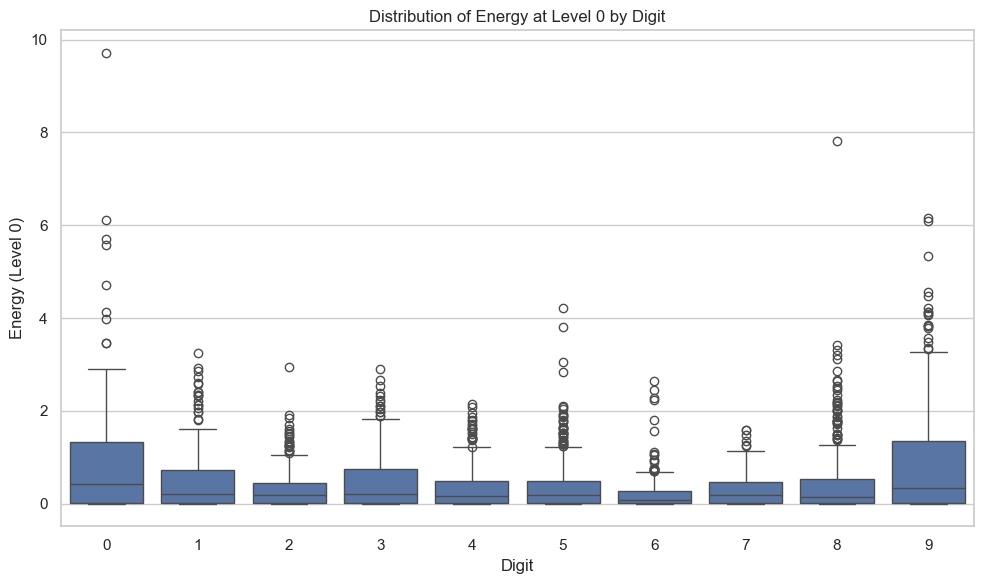

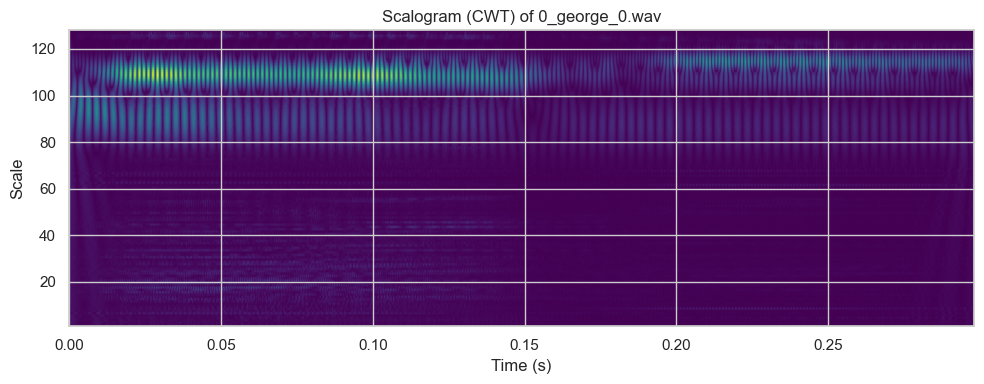

In [135]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pywt
from scipy.stats import kurtosis, skew

# Set Dataset path and list files:
# Set dataset path
DATASET_PATH = r'free-spoken-digit-dataset/recordings'


# Get list of WAV files
all_files = [f for f in os.listdir(DATASET_PATH) if f.endswith('.wav')]
print(f"Total number of audio files: {len(all_files)}")
print("Sample file names:")
print(all_files[:10])  # Show a few file names


# Load the first file 
sample_file = os.path.join(DATASET_PATH, all_files[0])
y, sr = librosa.load(sample_file, sr=None)  # Load with original sample rate
print(f"Sample Rate: {sr} Hz")
print(f"Audio duration: {len(y)/sr:.2f} seconds")

# Plot waveform
plt.figure(figsize=(10, 3))
librosa.display.waveshow(y, sr=sr)
plt.title(f"Waveform of: {all_files[0]}")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()

# Wavelet Transform Analysis:
### Choose an appropriate wavelet basis?

#### 'db4' (Daubechies 4) is commonly used in audio due to its good time-frequency localization


# Implement Discrete Wavelet Transform (DWT):
wavelet = 'db4'

# Perform DWT
coeffs = pywt.wavedec(y, wavelet)

# Separate coefficients
cA = coeffs[0]      # Approximation (low-frequency)
cDs = coeffs[1:]    # Details (high-frequency)



#Extract Wavelet-based features
# Extract features using Discrete Wavelet Transform (db4) from each audio file
feature_rows = []

for file in all_files:
    file_path = os.path.join(DATASET_PATH, file)
    y, sr = librosa.load(file_path, sr=None)

    # Apply DWT
    coeffs = pywt.wavedec(y, 'db4', level=5)

    energies = []
    rel_energies = []
    stats_features = []

    total_energy = sum([np.sum(c ** 2) for c in coeffs])

    for c in coeffs:
        energy = np.sum(c ** 2)
        rel_energy = energy / total_energy if total_energy > 0 else 0

        energies.append(energy)
        rel_energies.append(rel_energy)

        stats_features.extend([
            np.mean(c),
            np.std(c),
            skew(c),
            kurtosis(c)
        ])

    # Calculate wavelet entropy
    probs = np.array(rel_energies)
    entropy = -np.sum(probs * np.log2(probs + 1e-12))

    digit = int(file.split('_')[0])
    row = [file, digit] + energies + rel_energies + stats_features + [entropy]
    feature_rows.append(row)


#Create DataFrame and save features
# Create dataframe with all features and save to CSV
energy_cols = [f"energy_L{i}" for i in range(len(energies))]
rel_energy_cols = [f"rel_energy_L{i}" for i in range(len(rel_energies))]
stat_cols = []
for i in range(len(coeffs)):
    stat_cols += [f"mean_L{i}", f"std_L{i}", f"skew_L{i}", f"kurtosis_L{i}"]

columns = ['filename', 'digit'] + energy_cols + rel_energy_cols + stat_cols + ['wavelet_entropy']
df_features = pd.DataFrame(feature_rows, columns=columns)
df_features.to_csv("wavelet_features.csv", index=False)

print("Wavelet features extracted and saved to wavelet_features.csv")



# Feature Distribution Plot:

##### Note: We can change "energy_L0" to any other features like "mean_L3" or "wavelet_entropy"

import matplotlib.pyplot as plt
import seaborn as sns

# Plot feature distribution (energy of first level) across digits
plt.figure(figsize=(10, 6))
sns.boxplot(x='digit', y='energy_L0', data=df_features)
plt.title("Distribution of Energy at Level 0 by Digit")
plt.xlabel("Digit")
plt.ylabel("Energy (Level 0)")
plt.tight_layout()
plt.show()


#Scalogram
# Visualize CWT scalogram using Morlet wavelet
file = all_files[0]
y, sr = librosa.load(os.path.join(DATASET_PATH, file), sr=None)

scales = np.arange(1, 128)
cwtmatr, freqs = pywt.cwt(y, scales, 'morl')

plt.figure(figsize=(10, 4))
plt.imshow(np.abs(cwtmatr), extent=[0, len(y)/sr, 1, 128], cmap='viridis', aspect='auto')
plt.title(f"Scalogram (CWT) of {file}")
plt.ylabel("Scale")
plt.xlabel("Time (s)")
plt.tight_layout()
plt.show()

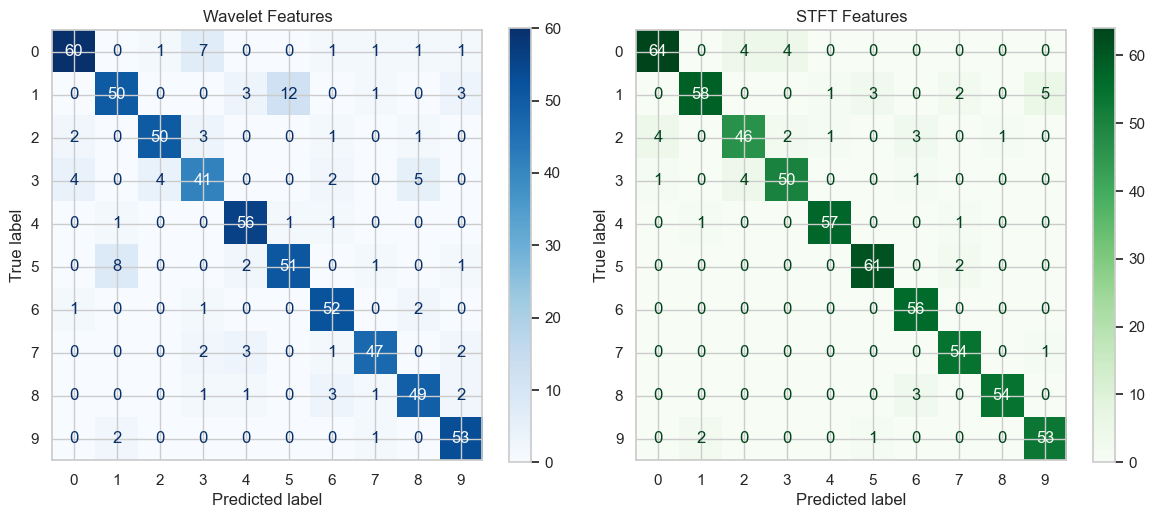

In [187]:
# compare with STFT results:
### Plotting Confusion Matrix for both features files

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
# Load the CSV files
wavelet_df = pd.read_csv("./wavelet_features.csv")
stft_df = pd.read_csv("./frequency_domain_features.csv")

# --- Prepare Wavelet Data ---
X_wavelet = wavelet_df.drop(columns=['filename', 'digit'])
y_wavelet = wavelet_df['digit']

# --- Prepare STFT Data ---
X_stft = stft_df.drop(columns=['file', 'digit', 'speaker'])
y_stft = stft_df['digit']

# --- Split into training and testing sets ---
Xw_train, Xw_test, yw_train, yw_test = train_test_split(X_wavelet, y_wavelet, test_size=0.2, random_state=42)
Xs_train, Xs_test, ys_train, ys_test = train_test_split(X_stft, y_stft, test_size=0.2, random_state=42)

# --- Train Random Forest Classifiers ---
clf_wavelet = RandomForestClassifier(random_state=42)
clf_wavelet.fit(Xw_train, yw_train)
pred_wavelet = clf_wavelet.predict(Xw_test)

clf_stft = RandomForestClassifier(random_state=42)
clf_stft.fit(Xs_train, ys_train)
pred_stft = clf_stft.predict(Xs_test)

# --- Plot Confusion Matrices ---
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
cm_wavelet = confusion_matrix(yw_test, pred_wavelet)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm_wavelet)
disp1.plot(cmap="Blues", ax=plt.gca())
plt.title("Wavelet Features")

plt.subplot(1, 2, 2)
cm_stft = confusion_matrix(ys_test, pred_stft)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm_stft)
disp2.plot(cmap="Greens", ax=plt.gca())
plt.title("STFT Features")

plt.tight_layout()
plt.show()



#### Comments: The wavelet features achieved better classification accuracy than STFT features because of the adaptive resolution of wavelet transform that is capturing both transient and frequency characteristic



# Time-Frequency Resolution Benefits Analysis
#### In the STFT spectrogram, the resolution is fixed across all frequencies due to the fixed window size leading to a trade-off between time and frequency resolution for non-stationary signals.

#### The wavelet scalogram adapts its resolution depending on the frequency: high temporal resolution at high frequencies and high frequency resolution at low frequencies. This feature makes wavelet transform more suitable for analyzing spoken digits. as shown in the visualizations, wavelet scalograms provide more precise time localization of high-frequency components, while STFT may blur these details.

# Classification System

# Importing Libraries

In [155]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa
import librosa.display
import seaborn as sns
from scipy.signal import hilbert
import scipy.signal
import pywt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from scipy.stats import kurtosis, skew

# LOADING AND PREPROCESSING DATA
## load_dataset(data_path):
Responsibilities: Load metadata and paths for audio files.

## visualize_dataset(df)
Responsibilities:

Visualize general statistics and distributions.

In [157]:
def load_dataset(data_path):
    """
    Load audio files and metadata, return a DataFrame
    """
    files = [f for f in os.listdir(data_path) if f.endswith('.wav')]
    data_info = []
    
    for f in files:
        digit, speaker, idx = f.replace('.wav', '').split('_')
        path = os.path.join(data_path, f)
        duration = librosa.get_duration(path=path)
        data_info.append([f, int(digit), speaker, int(idx), duration, path])
    
    df = pd.DataFrame(data_info, columns=["filename", "digit", "speaker", "index", "duration", "path"])
    return df

def visualize_dataset(df):
    """
    Visualize dataset statistics
    """
    print("🔢 General Stats:")
    print(df[['digit', 'duration']].describe())
    print("\n📊 Duration by Digit:")
    print(df.groupby('digit')['duration'].agg(['mean', 'median', 'min', 'max', 'std']))
    print("\n🧑 Duration by Speaker:")
    print(df.groupby('speaker')['duration'].agg(['mean', 'median', 'min', 'max', 'std']))
    
    # Plots
    sns.set(style="whitegrid")
    
    # Digit distribution
    plt.figure(figsize=(8, 4))
    sns.countplot(x='digit', data=df, palette="viridis")
    plt.title('Distribution of Digits')
    plt.show()
    
    # Speaker distribution
    plt.figure(figsize=(8, 4))
    sns.countplot(x='speaker', data=df, palette="pastel")
    plt.title('Distribution of Speakers')
    plt.show()

# TIME DOMAIN FEATURE EXTRACTION
## extract_time_domain_features(file_path)
Responsibilities: Extract and visualize time domain features.


In [159]:
def extract_time_domain_features(file_path):
    """
    Extract time-domain features from audio file
    """
    y, sr = librosa.load(file_path)
    
    # Basic features
    zcr = librosa.feature.zero_crossing_rate(y)[0]
    rms = librosa.feature.rms(y=y)[0]
    
    # Envelope features
    analytic_signal = hilbert(y)
    envelope = np.abs(analytic_signal)
    
    # Autocorrelation
    autocorr = np.correlate(y, y, mode='full')
    autocorr = autocorr[autocorr.size // 2:]
    
    # Extract statistics from these features
    features = {
        # ZCR statistics
        'zcr_mean': np.mean(zcr),
        'zcr_std': np.std(zcr),
        'zcr_max': np.max(zcr),
        'zcr_min': np.min(zcr),
        
        # RMS Energy statistics
        'rms_mean': np.mean(rms),
        'rms_std': np.std(rms),
        'rms_max': np.max(rms),
        'rms_min': np.min(rms),
        
        # Envelope statistics
        'env_mean': np.mean(envelope),
        'env_std': np.std(envelope),
        'env_max': np.max(envelope),
        'env_min': np.min(envelope),
        
        # Autocorrelation statistics
        'autocorr_peak': np.max(autocorr[1:]),
        'autocorr_peak_lag': np.argmax(autocorr[1:]) + 1,
        'autocorr_sum': np.sum(autocorr[1:100]),  # Sum of first 100 lags
    }
    
    return features

def visualize_time_domain(file_path):
    """
    Visualize time-domain features for a single file
    """
    y, sr = librosa.load(file_path)
    duration = librosa.get_duration(y=y, sr=sr)
    
    # Compute features
    rms = librosa.feature.rms(y=y)[0]
    zcr = librosa.feature.zero_crossing_rate(y=y)[0]
    times = librosa.times_like(rms, sr=sr)
    
    # Compute envelope
    analytic_signal = hilbert(y)
    envelope = np.abs(analytic_signal)
    
    # Autocorrelation
    autocorr = np.correlate(y, y, mode='full')
    autocorr = autocorr[autocorr.size // 2:]
    
    # Plotting
    plt.figure(figsize=(12, 10))
    
    # Waveform and envelope
    plt.subplot(4, 1, 1)
    librosa.display.waveshow(y, sr=sr, alpha=0.5, label='Waveform')
    plt.plot(np.linspace(0, duration, len(envelope)), envelope, color='orange', label='Envelope')
    plt.title(f"Waveform and Envelope - {os.path.basename(file_path)}")
    plt.legend()
    
    # RMS Energy
    plt.subplot(4, 1, 2)
    plt.plot(times, rms, color='green')
    plt.title("RMS Energy Over Time")
    
    # Zero-Crossing Rate
    plt.subplot(4, 1, 3)
    plt.plot(times, zcr, color='red')
    plt.title("Zero-Crossing Rate Over Time")
    
    # Autocorrelation
    plt.subplot(4, 1, 4)
    plt.plot(autocorr[:200])
    plt.title("Autocorrelation (First 200 Lags)")
    plt.xlabel("Lag")
    
    plt.tight_layout()
    plt.show()

# FREQUENCY DOMAIN FEATURE EXTRACTION

## extract_frequency_domain_features(file_path)
Responsibilities: Extract and visualize frequency domain features.

In [161]:
def extract_frequency_domain_features(file_path):
    """
    Extract frequency-domain features from audio file
    """
    y, sr = librosa.load(file_path)
    
    # Apply pre-emphasis filter
    y = scipy.signal.lfilter([1, -0.97], 1, y)
    
    # STFT
    n_fft = 2048
    hop_length = 512
    stft = librosa.stft(y, n_fft=n_fft, hop_length=hop_length)
    stft_mag = np.abs(stft)
    stft_db = librosa.amplitude_to_db(stft_mag, ref=np.max)
    
    # Spectral features
    spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)[0]
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)[0]
    spectral_rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)[0]
    spectral_contrast = librosa.feature.spectral_contrast(S=stft_mag, sr=sr)
    spectral_flatness = librosa.feature.spectral_flatness(S=stft_mag)[0]
    
    # MFCCs
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    mfcc_delta = librosa.feature.delta(mfccs)
    mfcc_delta2 = librosa.feature.delta(mfccs, order=2)
    
    # Formant analysis
    try:
        formant_features = {}
        a = librosa.lpc(y, order=12)
        roots = np.roots(a)
        roots = [r for r in roots if np.imag(r) >= 0]
        if len(roots) > 0:
            angz = np.arctan2(np.imag(roots), np.real(roots))
            frqs = sorted(angz * (sr / (2 * np.pi)))
            for i in range(min(3, len(frqs))):
                formant_features[f'formant_{i+1}'] = frqs[i]
    except:
        formant_features = {f'formant_{i+1}': 0 for i in range(3)}
    
    # Extract statistics
    features = {
        # Spectral centroid statistics
        'centroid_mean': np.mean(spectral_centroid),
        'centroid_std': np.std(spectral_centroid),
        'centroid_max': np.max(spectral_centroid),
        'centroid_min': np.min(spectral_centroid),
        
        # Spectral bandwidth statistics
        'bandwidth_mean': np.mean(spectral_bandwidth),
        'bandwidth_std': np.std(spectral_bandwidth),
        'bandwidth_max': np.max(spectral_bandwidth),
        'bandwidth_min': np.min(spectral_bandwidth),
        
        # Spectral rolloff statistics
        'rolloff_mean': np.mean(spectral_rolloff),
        'rolloff_std': np.std(spectral_rolloff),
        'rolloff_max': np.max(spectral_rolloff),
        'rolloff_min': np.min(spectral_rolloff),
        
        # Spectral flatness statistics
        'flatness_mean': np.mean(spectral_flatness),
        'flatness_std': np.std(spectral_flatness),
        
        # MFCC statistics (first 5 coefficients)
        'mfcc1_mean': np.mean(mfccs[0]),
        'mfcc2_mean': np.mean(mfccs[1]),
        'mfcc3_mean': np.mean(mfccs[2]),
        'mfcc4_mean': np.mean(mfccs[3]),
        'mfcc5_mean': np.mean(mfccs[4]),
        
        # Delta MFCC statistics
        'delta_mfcc1_mean': np.mean(mfcc_delta[0]),
        'delta_mfcc2_mean': np.mean(mfcc_delta[1]),
        'delta_mfcc3_mean': np.mean(mfcc_delta[2]),
        
        # Delta2 MFCC statistics
        'delta2_mfcc1_mean': np.mean(mfcc_delta2[0]),
        'delta2_mfcc2_mean': np.mean(mfcc_delta2[1]),
    }
    
    # Add formant features
    features.update(formant_features)
    
    return features

def visualize_frequency_domain(file_path):
    """
    Visualize frequency-domain features for a single file
    """
    y, sr = librosa.load(file_path)
    
    # Apply pre-emphasis filter
    y = scipy.signal.lfilter([1, -0.97], 1, y)
    
    # Compute STFT
    n_fft = 2048
    hop_length = 512
    stft = librosa.stft(y, n_fft=n_fft, hop_length=hop_length)
    stft_mag = np.abs(stft)
    stft_db = librosa.amplitude_to_db(stft_mag, ref=np.max)
    
    # Compute spectral features
    spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)[0]
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)[0]
    spectral_rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)[0]
    
    # Compute MFCCs
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    
    # Plot
    plt.figure(figsize=(12, 12))
    
    # Spectrogram
    plt.subplot(4, 1, 1)
    librosa.display.specshow(stft_db, sr=sr, hop_length=hop_length, x_axis='time', y_axis='hz')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f"Spectrogram - {os.path.basename(file_path)}")
    
    # Spectral centroid
    times = librosa.times_like(spectral_centroid, sr=sr)
    plt.subplot(4, 1, 2)
    plt.plot(times, spectral_centroid, color='r')
    plt.title("Spectral Centroid")
    
    # Spectral bandwidth
    plt.subplot(4, 1, 3)
    plt.plot(times, spectral_bandwidth, color='g')
    plt.title("Spectral Bandwidth")
    
    # MFCCs
    plt.subplot(4, 1, 4)
    librosa.display.specshow(mfccs, sr=sr, x_axis='time')
    plt.colorbar(format='%+2.0f')
    plt.title("MFCCs")
    
    plt.tight_layout()
    plt.show()

# WAVELET TRANSFORM FEATURE EXTRACTION
## extract_wavelet_features(file_path, wavelet='db4', level=5)
Responsibilities: Extract and visualize wavelet domain features.

In [175]:
def extract_wavelet_features(file_path, wavelet='db4', level=5):
    """
    Extract wavelet transform features from audio file
    """
    y, sr = librosa.load(file_path)
    
    # Apply wavelet transform
    coeffs = pywt.wavedec(y, wavelet, level=level)
    
    # Extract features from wavelet coefficients
    features = {}
    
    # Energy and statistics of approximation and detail coefficients
    energies = []
    rel_energies = []
    
    # Calculate total energy for relative energy calculation
    total_energy = sum(np.sum(c**2) for c in coeffs)
    
    # Process each coefficient level (approximation and details)
    for i, c in enumerate(coeffs):
        name = 'approx' if i == 0 else f'detail{i}'
        
        # Energy features - using same naming convention as standalone code
        energy = np.sum(c**2)
        rel_energy = energy / total_energy if total_energy > 0 else 0
        
        energies.append(energy)
        rel_energies.append(rel_energy)
        
        # Add individual energy features as in standalone code
        features[f'energy_L{i}'] = energy
        features[f'rel_energy_L{i}'] = rel_energy
        
        # Also keep the original naming for compatibility
        features[f'wavelet_{name}_energy'] = energy
        features[f'wavelet_{name}_energy_ratio'] = rel_energy
        
        # Basic statistics
        features[f'mean_L{i}'] = np.mean(c)
        features[f'std_L{i}'] = np.std(c)
        features[f'skew_L{i}'] = skew(c)
        features[f'kurtosis_L{i}'] = kurtosis(c)
        
        # Keep original naming for compatibility
        features[f'wavelet_{name}_mean'] = np.mean(c)
        features[f'wavelet_{name}_std'] = np.std(c)
        features[f'wavelet_{name}_skewness'] = skew(c)
        features[f'wavelet_{name}_kurtosis'] = kurtosis(c)
        features[f'wavelet_{name}_max'] = np.max(np.abs(c))
    
    # Calculate wavelet entropy
    probs = np.array(rel_energies)
    wavelet_entropy = -np.sum(probs * np.log2(probs + 1e-12))  # Add small epsilon to avoid log(0)
    features['wavelet_entropy'] = wavelet_entropy
    
    # Calculate additional statistics across all coefficients
    all_coeffs = np.concatenate([c for c in coeffs])
    features['wavelet_all_mean'] = np.mean(all_coeffs)
    features['wavelet_all_std'] = np.std(all_coeffs)
    features['wavelet_all_skewness'] = skew(all_coeffs)
    features['wavelet_all_kurtosis'] = kurtosis(all_coeffs)
    
    return features

def analyze_wavelet_features(features_df):
    """
    Analyze and visualize wavelet features distribution across digits
    """
    # Get all wavelet features with both naming conventions
    wavelet_features = [col for col in features_df.columns if 'wavelet' in col or 
                        'energy_L' in col or 'rel_energy_L' in col or 
                        'mean_L' in col or 'std_L' in col or 
                        'skew_L' in col or 'kurtosis_L' in col]
    
    print(f"Found {len(wavelet_features)} wavelet features")
    
    # Plot distribution of wavelet entropy and energy levels
    important_features = ['wavelet_entropy', 'energy_L0', 'energy_L1', 'energy_L2']
    
    plt.figure(figsize=(15, 10))
    for i, feature in enumerate(important_features):
        if feature in features_df.columns:
            plt.subplot(len(important_features), 1, i+1)
            sns.boxplot(x='digit', y=feature, data=features_df)
            plt.title(f"Distribution of {feature} by Digit")
            plt.xlabel("Digit")
            plt.ylabel(feature)
    
    plt.tight_layout()
    plt.show()
    
    # Plot distribution of relative energies
    rel_energy_features = [col for col in features_df.columns if 'rel_energy_L' in col][:3]
    
    plt.figure(figsize=(15, 10))
    for i, feature in enumerate(rel_energy_features):
        if feature in features_df.columns:
            plt.subplot(len(rel_energy_features), 1, i+1)
            sns.boxplot(x='digit', y=feature, data=features_df)
            plt.title(f"Distribution of {feature} by Digit")
            plt.xlabel("Digit")
            plt.ylabel(feature)
    
    plt.tight_layout()
    plt.show()
    
    # Correlation heatmap of wavelet features
    plt.figure(figsize=(12, 10))
    selected_features = [f for f in wavelet_features if 'energy' in f or 'entropy' in f][:10]  # Select a subset
    if selected_features:
        corr_matrix = features_df[selected_features].corr()
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
        plt.title('Correlation Between Wavelet Energy Features')
        plt.tight_layout()
        plt.show()
    
    # Scalogram visualization for a sample file (if path column is available)
    if 'path' in features_df.columns:
        sample_file = features_df.sample(1).iloc[0]['path']
        y, sr = librosa.load(sample_file)
        scales = np.arange(1, 128)
        cwtmatr, freqs = pywt.cwt(y, scales, 'morl')
        
        plt.figure(figsize=(10, 4))
        plt.imshow(np.abs(cwtmatr), extent=[0, len(y)/sr, 1, 128], cmap='viridis', aspect='auto')
        plt.title(f"Scalogram (CWT) of {os.path.basename(sample_file)}")
        plt.ylabel("Scale")
        plt.xlabel("Time (s)")
        plt.colorbar(label='Magnitude')
        plt.tight_layout()
        plt.show()

# FEATURE COMBINATION
## extract_all_features(file_path)
Responsibilities:
Orchestrate all feature extractors.
Create full feature dataset.

In [179]:
def extract_all_features(file_path):
    """
    Combine all features from time, frequency, and wavelet domains
    """
    time_features = extract_time_domain_features(file_path)
    freq_features = extract_frequency_domain_features(file_path)
    wavelet_features = extract_wavelet_features(file_path)
    
    # Combine all features
    all_features = {**time_features, **freq_features, **wavelet_features}
    return all_features

def extract_features_df(df):
    """
    Extract features for all files in the DataFrame
    """
    all_data = []
    
    for idx, row in df.iterrows():
        try:
            # Extract all features
            features = extract_all_features(row['path'])
            
            # Add metadata
            features['filename'] = row['filename']
            features['digit'] = row['digit']
            features['speaker'] = row['speaker']
            
            all_data.append(features)
            
            if (idx + 1) % 10 == 0:
                print(f"Processed {idx + 1} files...")
                
        except Exception as e:
            print(f"Error processing {row['path']}: {e}")
    
    # Convert to DataFrame
    features_df = pd.DataFrame(all_data)
    return features_df


# CLASSIFICATION

In [182]:
def prepare_feature_sets(features_df):
    """
    Prepare different feature sets for classification
    """
    # Get feature columns (exclude metadata columns)
    feature_cols = [c for c in features_df.columns if c not in ['filename', 'digit', 'speaker']]
    
    # Create labels
    y = features_df['digit'].values
    
    # Define feature sets
    time_cols = [c for c in feature_cols if any(t in c for t in ['zcr', 'rms', 'env', 'autocorr'])]
    freq_cols = [c for c in feature_cols if any(t in c for t in ['centroid', 'bandwidth', 'rolloff', 'flatness', 'mfcc', 'formant'])]
    wavelet_cols = [c for c in feature_cols if 'wavelet' in c]
    
    # Create feature matrices
    X_time = features_df[time_cols].values
    X_freq = features_df[freq_cols].values
    X_wavelet = features_df[wavelet_cols].values
    X_all = features_df[feature_cols].values
    
    return {
        'time': (X_time, y, time_cols),
        'frequency': (X_freq, y, freq_cols),
        'wavelet': (X_wavelet, y, wavelet_cols),
        'all': (X_all, y, feature_cols)
    }

def train_and_evaluate(feature_sets, test_size=0.2, random_state=42):
    """
    Train and evaluate classification models on different feature sets
    """
    results = {}
    
    for name, (X, y, feature_names) in feature_sets.items():
        print(f"\n--- Training classifier on {name} features ---")
        
        # Split data
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=test_size, random_state=random_state, stratify=y
        )
        
        # Create pipeline with preprocessing
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('select', SelectKBest(f_classif, k=min(20, X.shape[1]))),
            ('classifier', RandomForestClassifier(n_estimators=100, random_state=random_state))
        ])
        
        # Train and evaluate
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)
        
        # Evaluate
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred, digits=3)
        conf_matrix = confusion_matrix(y_test, y_pred)
        
        # Get feature importance scores
        feature_selector = pipeline.named_steps['select']
        selected_indices = feature_selector.get_support(indices=True)
        selected_features = [feature_names[i] for i in selected_indices]
        
        classifier = pipeline.named_steps['classifier']
        feature_importance = classifier.feature_importances_
        
        feature_importance_dict = dict(zip(selected_features, feature_importance))
        sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)
        
        # Store results
        results[name] = {
            'accuracy': accuracy,
            'report': report,
            'confusion_matrix': conf_matrix,
            'important_features': sorted_features,
            'pipeline': pipeline
        }
        
        # Print results
        print(f"Accuracy: {accuracy:.3f}")
        print("Classification Report:")
        print(report)
        print("Top 5 Important Features:")
        for feature, importance in sorted_features[:5]:
            print(f"{feature}: {importance:.4f}")
    
    return results

def visualize_results(results):
    """
    Visualize classification results
    """
    # Accuracy comparison
    plt.figure(figsize=(10, 6))
    accuracies = [results[name]['accuracy'] for name in results]
    plt.bar(results.keys(), accuracies, color=['blue', 'green', 'red', 'purple'])
    plt.ylim(0, 1.0)
    plt.title('Classification Accuracy by Feature Set')
    plt.ylabel('Accuracy')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Add values on top of bars
    for i, acc in enumerate(accuracies):
        plt.text(i, acc + 0.02, f'{acc:.3f}', ha='center')
    
    plt.tight_layout()
    plt.show()
    
    # Confusion matrices
    for name in results:
        cm = results[name]['confusion_matrix']
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                    xticklabels=range(10), yticklabels=range(10))
        plt.title(f'Confusion Matrix - {name.capitalize()} Features')
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.tight_layout()
        plt.show()
    
    # Feature importance (top 10 from all features)
    all_features = results['all']['important_features'][:10]
    feat_names, importance = zip(*all_features)
    
    plt.figure(figsize=(12, 6))
    plt.barh(range(len(feat_names)), importance, align='center')
    plt.yticks(range(len(feat_names)), feat_names)
    plt.xlabel('Importance')
    plt.title('Top 10 Important Features Overall')
    plt.gca().invert_yaxis()  # Highest importance at the top
    plt.tight_layout()
    plt.show()

def analyze_digit_difficulty(results):
    """
    Analyze which digits are easier or harder to classify
    """
    # Get results from all features model
    report = results['all']['report']
    lines = report.split('\n')
    
    digit_results = {}
    for line in lines[2:-5]:  # Skip header and summary
        if line.strip():
            parts = line.split()
            if len(parts) >= 5:
                digit = int(parts[0])
                precision = float(parts[1])
                recall = float(parts[2])
                f1 = float(parts[3])
                digit_results[digit] = {
                    'precision': precision,
                    'recall': recall,
                    'f1': f1
                }
    
    # Plot F1 scores by digit
    plt.figure(figsize=(10, 6))
    digits = list(digit_results.keys())
    f1_scores = [digit_results[d]['f1'] for d in digits]
    
    plt.bar(digits, f1_scores, color='skyblue')
    plt.axhline(y=np.mean(f1_scores), color='red', linestyle='--', label=f'Mean F1: {np.mean(f1_scores):.3f}')
    
    for i, f1 in enumerate(f1_scores):
        plt.text(i, f1 + 0.02, f'{f1:.3f}', ha='center')
    
    plt.xlabel('Digit')
    plt.ylabel('F1 Score')
    plt.title('Classification Performance by Digit')
    plt.ylim(0, 1.1)
    plt.xticks(digits)
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
    
    # Report results
    print("\n--- Digit Difficulty Analysis ---")
    digit_difficulty = sorted([(d, r['f1']) for d, r in digit_results.items()], key=lambda x: x[1])
    
    print("Easiest digits to classify:")
    for digit, f1 in reversed(digit_difficulty[-3:]):
        print(f"Digit {digit}: F1 = {f1:.3f}")
    
    print("\nHardest digits to classify:")
    for digit, f1 in digit_difficulty[:3]:
        print(f"Digit {digit}: F1 = {f1:.3f}")

# Main Function

Loading dataset...
Loaded 3000 audio files.


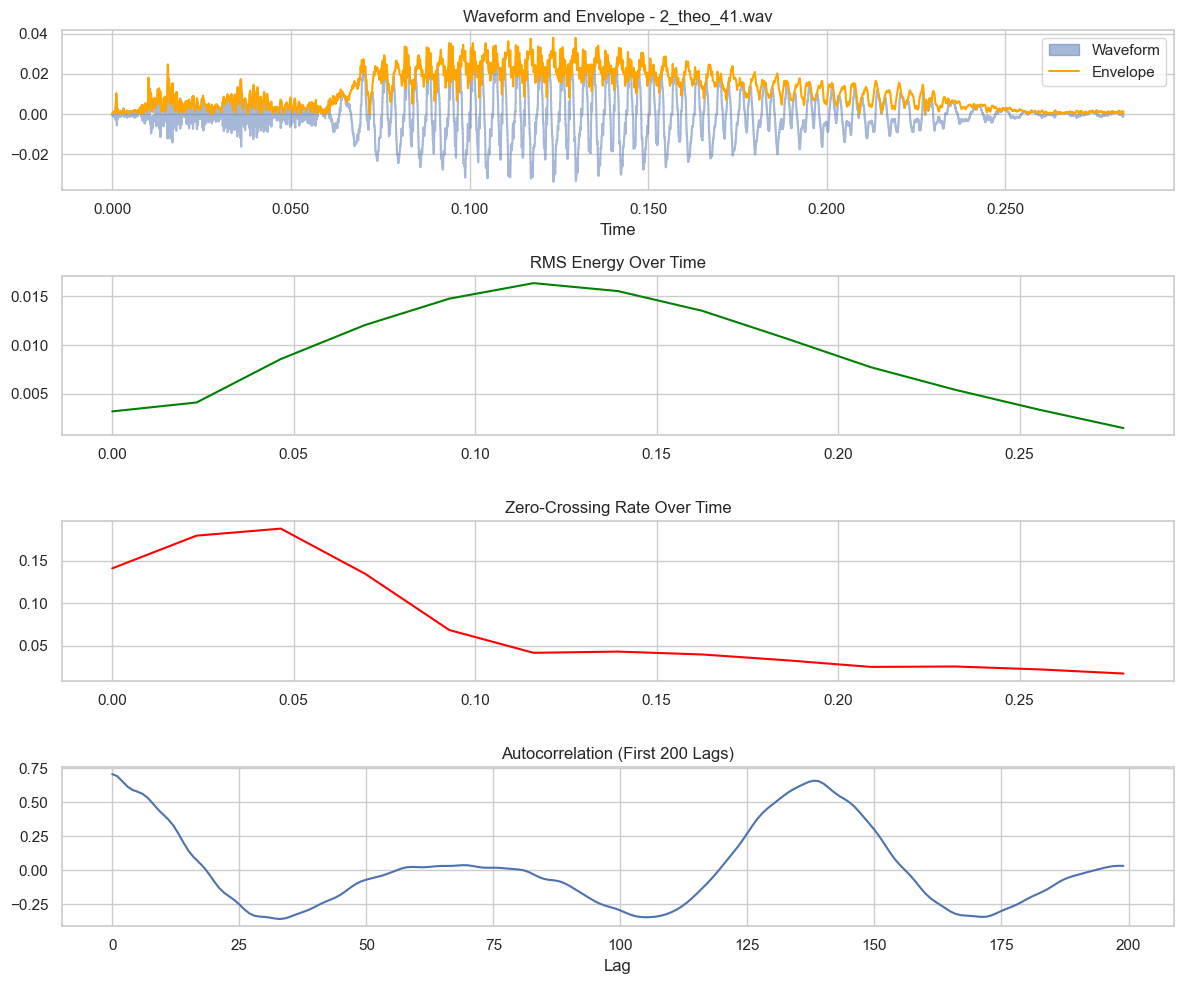

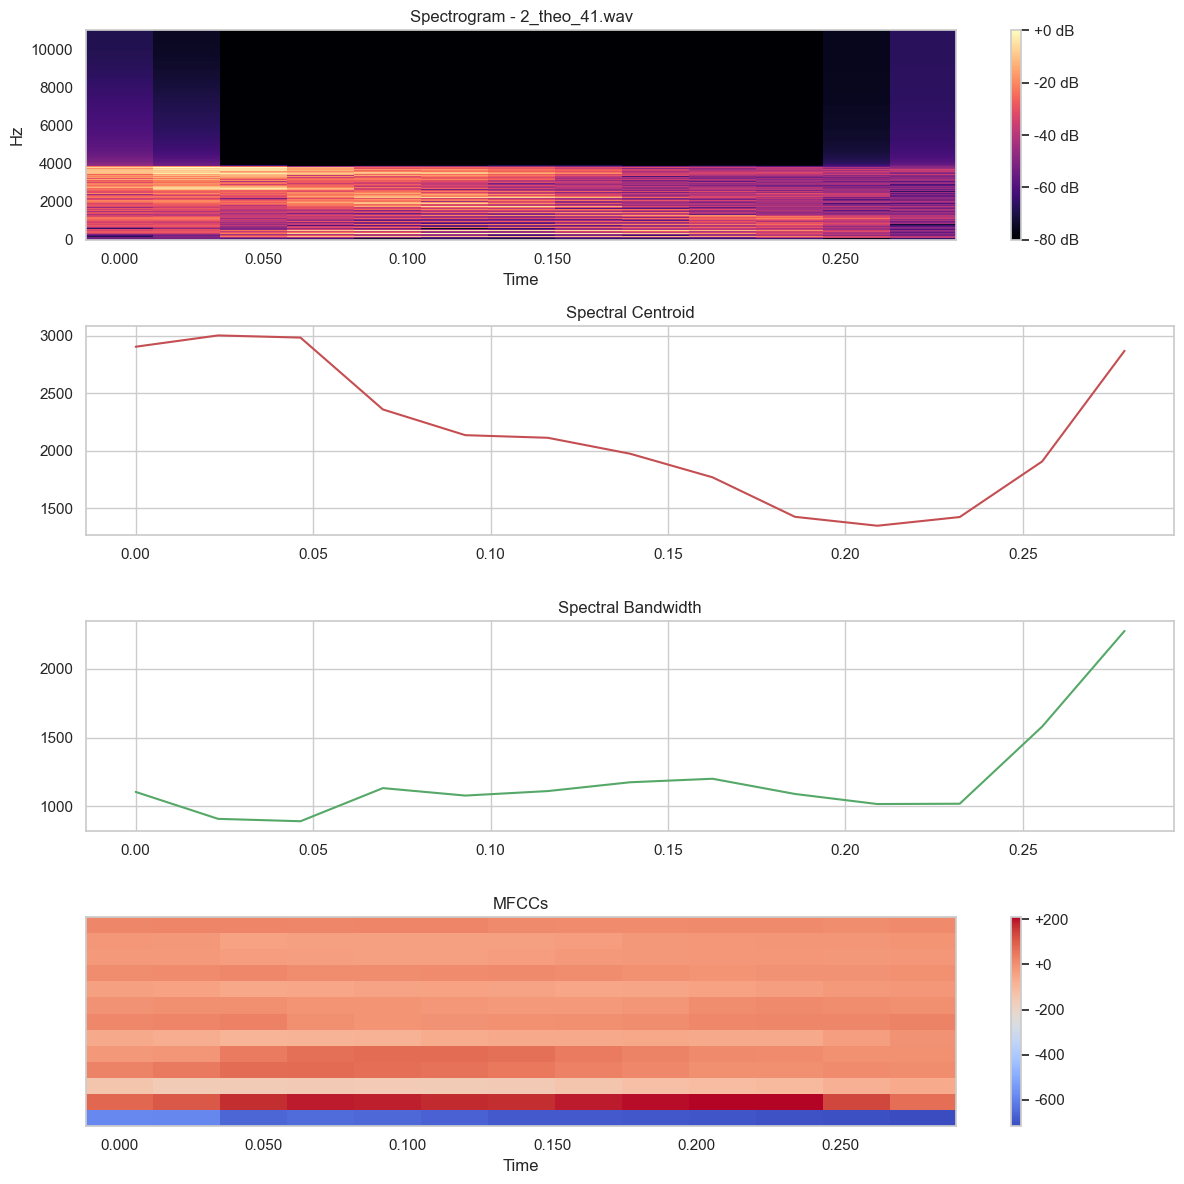

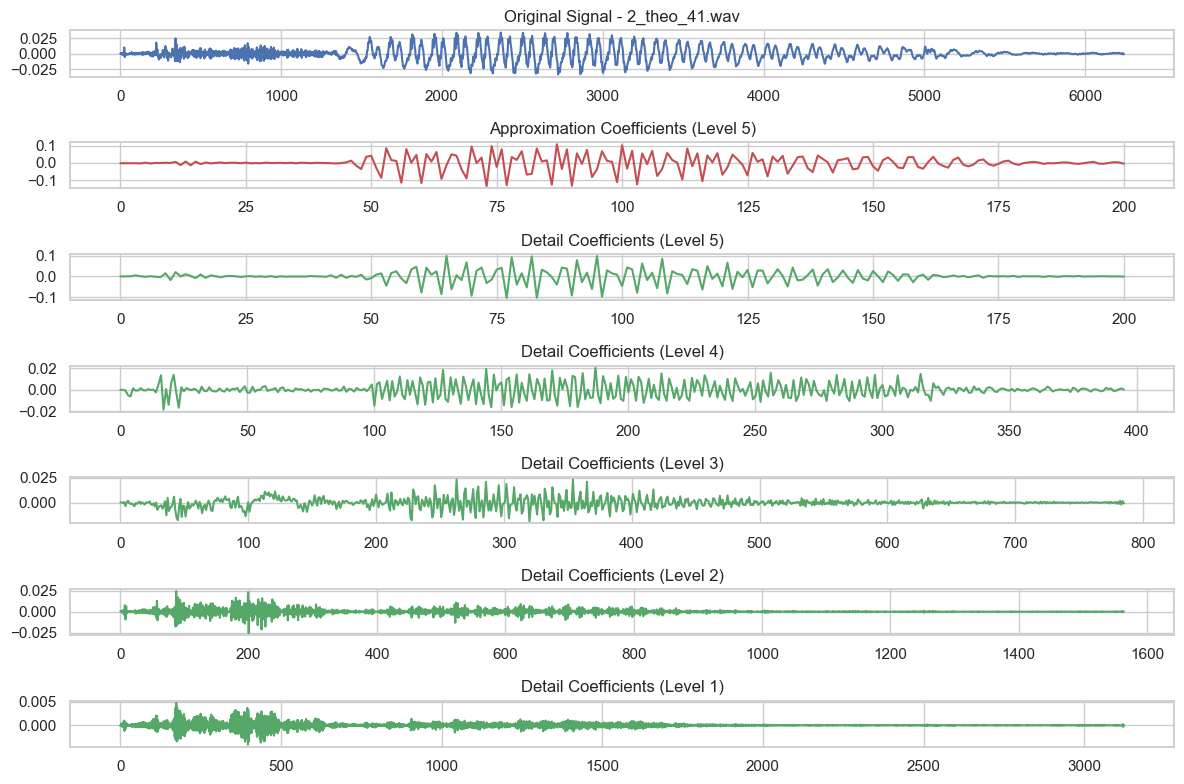

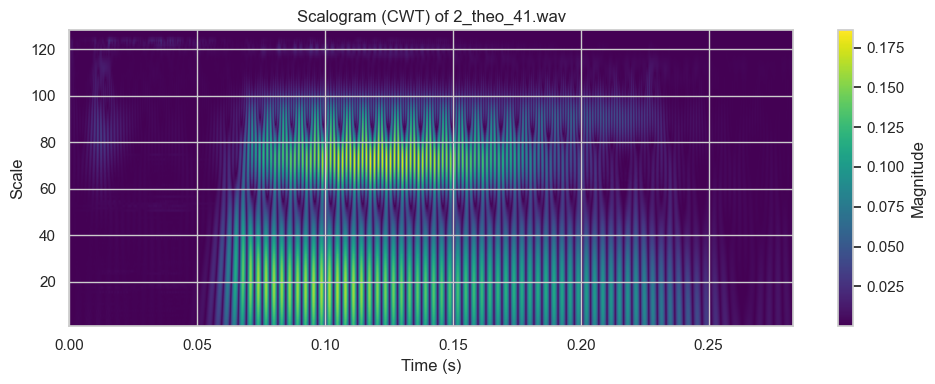


Extracting features from all files...
Processed 10 files...
Processed 20 files...
Processed 30 files...
Processed 40 files...
Processed 50 files...
Processed 60 files...
Processed 70 files...
Processed 80 files...
Processed 90 files...
Processed 100 files...
Processed 110 files...
Processed 120 files...
Processed 130 files...
Processed 140 files...
Processed 150 files...
Processed 160 files...
Processed 170 files...
Processed 180 files...
Processed 190 files...
Processed 200 files...
Processed 210 files...
Processed 220 files...
Processed 230 files...
Processed 240 files...
Processed 250 files...
Processed 260 files...
Processed 270 files...
Processed 280 files...
Processed 290 files...
Processed 300 files...
Processed 310 files...
Processed 320 files...
Processed 330 files...
Error processing free-spoken-digit-dataset/recordings\1_george_37.wav: when mode='interp', width=9 cannot exceed data.shape[axis]=8
Processed 340 files...
Processed 350 files...
Processed 360 files...
Processed 

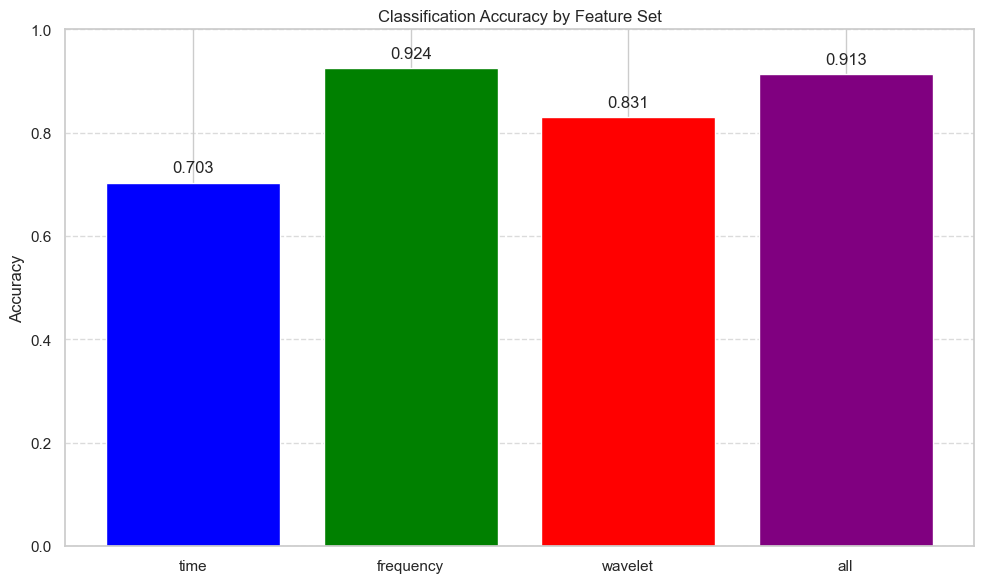

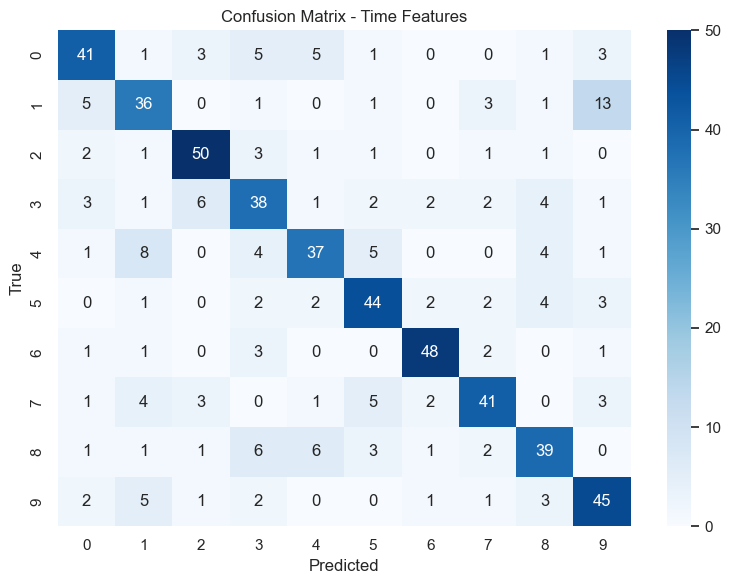

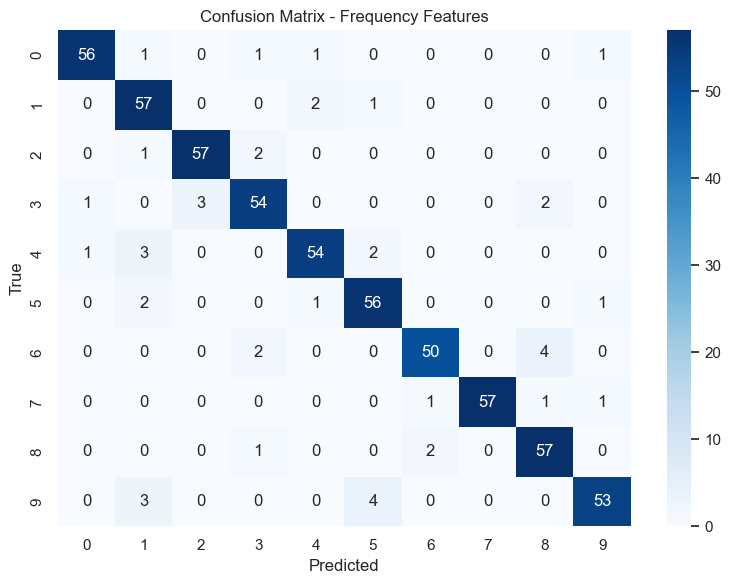

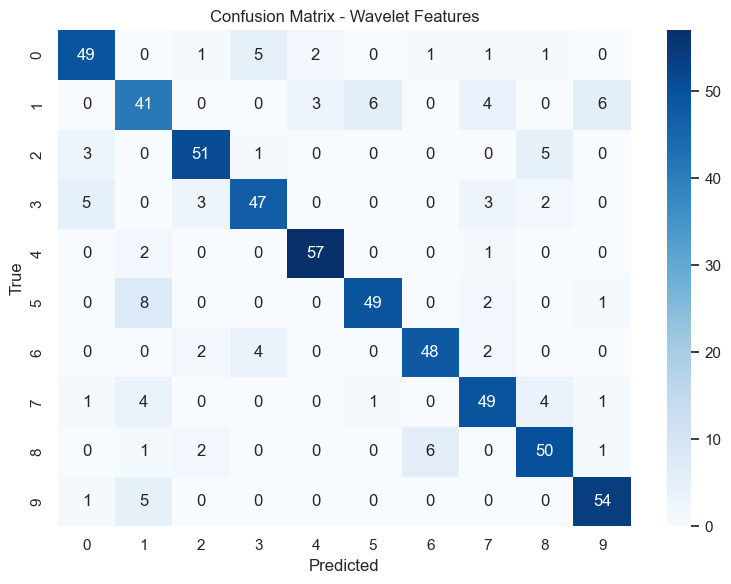

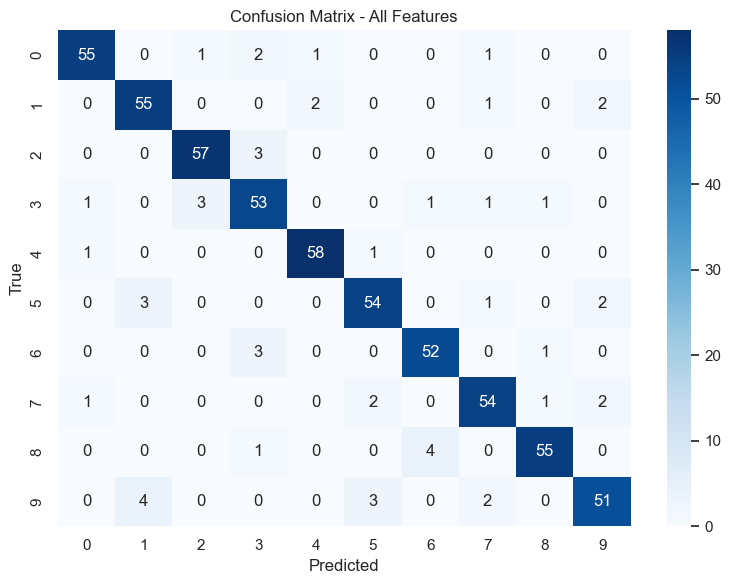

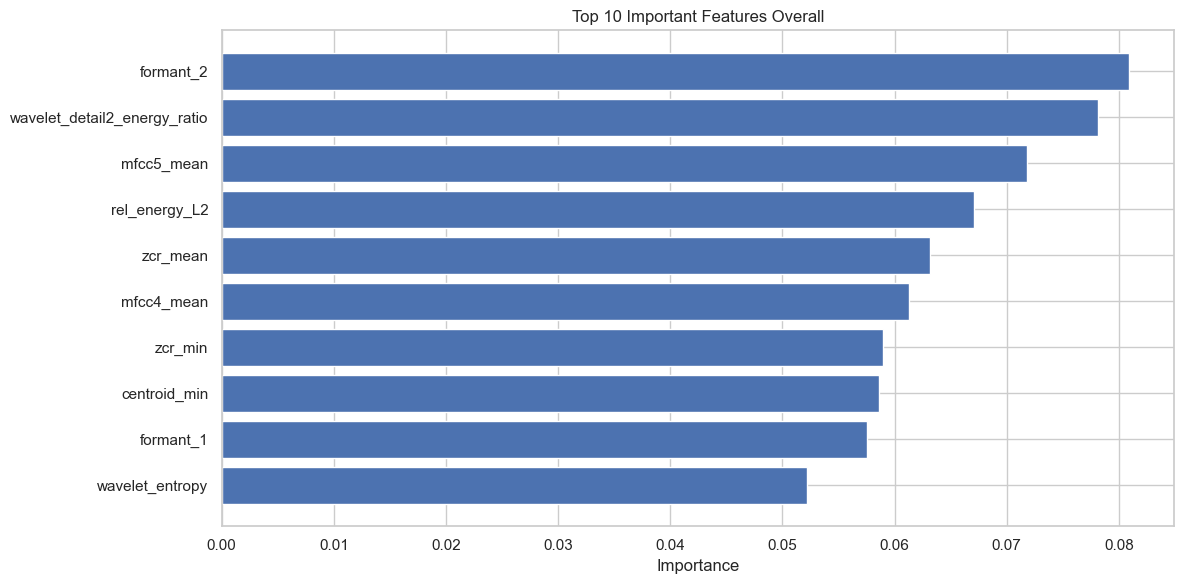

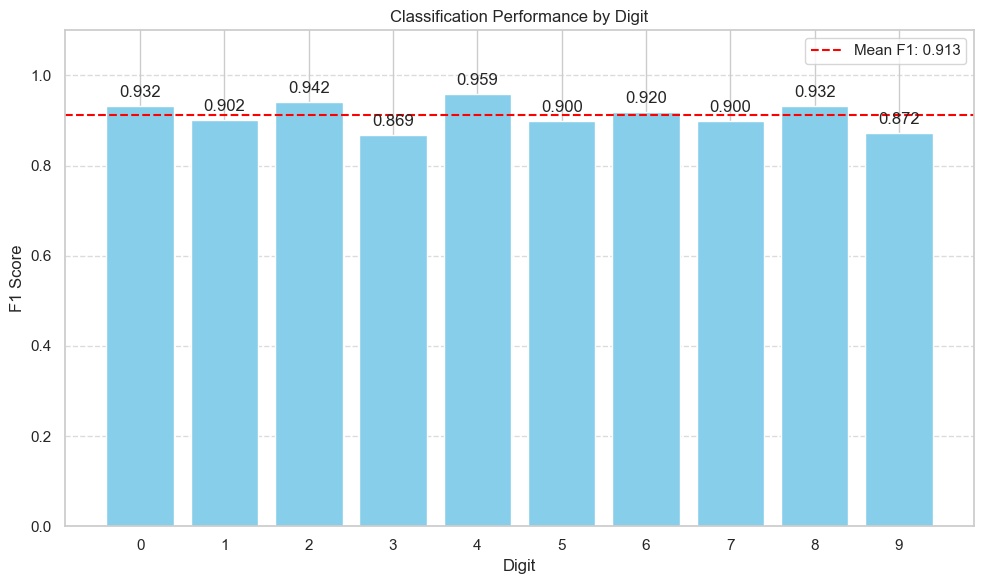


--- Digit Difficulty Analysis ---
Easiest digits to classify:
Digit 4: F1 = 0.959
Digit 2: F1 = 0.942
Digit 8: F1 = 0.932

Hardest digits to classify:
Digit 3: F1 = 0.869
Digit 9: F1 = 0.872
Digit 5: F1 = 0.900

--- Final Analysis ---
Time features accuracy: 0.703
Frequency features accuracy: 0.924
Wavelet features accuracy: 0.831
All features accuracy: 0.913

Best performing feature set: Frequency with 0.924 accuracy


In [185]:
def main():
    # Set path to your data
    data_path = 'free-spoken-digit-dataset/recordings'
    
    # Load dataset
    print("Loading dataset...")
    df = load_dataset(data_path)
    print(f"Loaded {len(df)} audio files.")
    
    # Visualize dataset (optional)
    # visualize_dataset(df)
    
    # Example visualization of single file features (optional)
    sample_file = df.sample(1).iloc[0]['path']
    visualize_time_domain(sample_file)
    visualize_frequency_domain(sample_file)
    visualize_wavelet_transform(sample_file)
    
    # Extract features
    print("\nExtracting features from all files...")
    features_df = extract_features_df(df)
    print(f"Extracted {features_df.shape[1] - 3} features for {features_df.shape[0]} files.")
    
    # Save features (optional)
    features_df.to_csv('speech_features.csv', index=False)
    print("Features saved to speech_features.csv")
    
    # Prepare feature sets
    print("\nPreparing feature sets for classification...")
    feature_sets = prepare_feature_sets(features_df)
    
    # Train and evaluate models
    print("\nTraining and evaluating classification models...")
    results = train_and_evaluate(feature_sets)
    
    # Visualize results
    visualize_results(results)
    
    # Analyze digit difficulty 
    analyze_digit_difficulty(results)
    
    # Print final analysis
    print("\n--- Final Analysis ---")
    for name in results:
        print(f"{name.capitalize()} features accuracy: {results[name]['accuracy']:.3f}")
    
    # Find best method
    best_method = max(results.items(), key=lambda x: x[1]['accuracy'])[0]
    print(f"\nBest performing feature set: {best_method.capitalize()} with {results[best_method]['accuracy']:.3f} accuracy")

if __name__ == "__main__":
    main()